# Pyfilaments exploratory data analysis notebook
Play around with analysis methods and ways of looking at the pyfilaments simulation data.

In [114]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
    
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import interpolate

import os
import pyfilaments.analysisutils as analysis
import imp
imp.reload(analysis)
%matplotlib notebook
plt.close('all')

# Figure parameters
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import cm
from tqdm import tqdm

rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rc('text', usetex='false') 
rcParams.update({'font.size': 12})

In [115]:
# Load data

# root_folder = '/media/deepak/DEEPAK-1TB/ActiveFilaments_Simulations_Backup_1/BendingStiffnessSweeps/b0_4_activity_time_2000'
# root_folder = '/media/deepak/DEEPAK-1TB/ActiveFilaments_Simulations_Backup/BendingStiffnessSweeps/b0_2_1/activity_time_750'
# root_folder = '/home/deepak/Dropbox/LacryModeling/ModellingResults/2021-03-05'

# Updated simulation data (no discretization errors)
# root_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/BendingStiffnessSweeps/b0_2_1_FullSweep_Final/activity_time_2000'
# root_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/FinerResolution_BendingStiffness/2021-08-15'
# root_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-10-19'
root_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20'

# bond length = 2.1
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-04/SimResults_Np_32_Shape_line_kappa_hat_3.75_k_15_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-04/SimResults_Np_32_Shape_line_kappa_hat_5.0_k_20_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-04/SimResults_Np_32_Shape_line_kappa_hat_6.25_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-04/SimResults_Np_32_Shape_line_kappa_hat_7.5_k_30_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-04/SimResults_Np_32_Shape_line_kappa_hat_12.5_k_50_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_01.hdf5'


# bond length = 4
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_5.0_k_20_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_02.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_7.5_k_30_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_01.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_10.0_k_40_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_12.5_k_50_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_01.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-07/SimResults_Np_32_Shape_line_kappa_hat_15.0_k_60_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_17.5_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-07/SimResults_Np_32_Shape_line_kappa_hat_20.0_k_80_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_25.0_k_100_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_01.hdf5'

# k = 65
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-09/SimResults_Np_32_Shape_line_kappa_hat_16.25_k_65_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# k = 75
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-09/SimResults_Np_32_Shape_line_kappa_hat_18.75_k_75_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'

# Irrational number for spring constant:
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-12/SimResults_Np_32_Shape_line_kappa_hat_17_k_69_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-12/SimResults_Np_32_Shape_line_kappa_hat_18_k_72_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_02.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-12/SimResults_Np_32_Shape_line_kappa_hat_19_k_75_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_02.hdf5'

# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-04/SimResults_Np_32_Shape_line_kappa_hat_6.25_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_01.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-07/SimResults_Np_32_Shape_line_kappa_hat_6.25_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-07/SimResults_Np_32_Shape_line_kappa_hat_5.0_k_20_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_00.hdf5'


# Long dataset (750 cycles)
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-11/SimResults_Np_32_Shape_line_kappa_hat_17.5_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_01.hdf5'

# file = 'SimResults_Np_32_Shape_line_kappa_hat_12.5_k_50_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_01.hdf5'

# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_7.5_k_30_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_9_k_35_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_10.0_k_40_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_11_k_45_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_12.5_k_50_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_14_k_55_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_15.0_k_60_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_16_k_62_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_17_k_69_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_17.5_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_18_k_72_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_19_k_75_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_20.0_k_80_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_21_k_85_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_25.0_k_100_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'

# track_folder = 'SimResults_Np_64_Shape_line_kappa_hat_18_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point'

# b0=2.1
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_3.75_k_15_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_5.0_k_20_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_6.25_k_25.0_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_7.5_k_30_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_8.75_k_35.0_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_6.0_k_25.0_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_9.0_k_35.0_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_11_k_45_b0_2.1_F_0_S_0_D_1.5_activityTime_2000_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_6_k_24.18_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.3974358974358974_activityTime_750_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.6794871794871793_activityTime_750_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.615384615384615_activityTime_750_simType_point'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5897435897435896_activityTime_750_simType_point'
# file = 'SimResults_00.hdf5'
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.0769230769230769_activityTime_750_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5256410256410255_activityTime_750_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.205128205128205_activityTime_750_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.3974358974358974_activityTime_750_simType_point/SimResults_00.hdf5'
# folder, *rest = os.path.split(os.path.join(root_folder, track_folder, file))

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ConstantCompressiveActivity_sweep/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.2692307692307692_activityTime_750_simType_point/SimResults_00_.hdf5'

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ConstantCompressiveActivity_sweep/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.205128205128205_activityTime_750_simType_point/SimResults_00_.hdf5'


# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2021-12-26/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0_activityTime_750_simType_point/SimResults_01_.hdf5'
# filament = analysis.analysisTools(file = os.path.join(root_folder, track_folder, file))
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.526_activityTime_750_simType_point/SimResults_00_.hdf5'

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.615_activityTime_750_simType_point/SimResults_00_.hdf5'

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/Analysis_test/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.744_activityTime_750_simType_point/SimResults_01_.hdf5'

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/Analysis_test/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.59_activityTime_750_simType_point/SimResults_00_.hdf5'


# file = '/Users/deepak/Dropbox/LacryModeling/2022-10-07/SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.78_activityTime_750_simType_point/sim_data_01_.hdf5'


# Activity 0.5
# file = '/Users/deepak/Dropbox/LacryModeling/2022-10-07/SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.5_activityTime_750_simType_point/sim_data_02_.hdf5'

# Activity 1.5
# file = '/Users/deepak/Dropbox/LacryModeling/2022-10-07/SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/sim_data_00_.hdf5'

# Activity 2.5
file = '/Users/deepak/Dropbox/LacryModeling/2022-10-07/SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.5_activityTime_750_simType_point/sim_data_00_.hdf5'


filament = analysis.analysisTools(file = file)

file_path = filament.analysisFolder




<IPython.core.display.Javascript object>


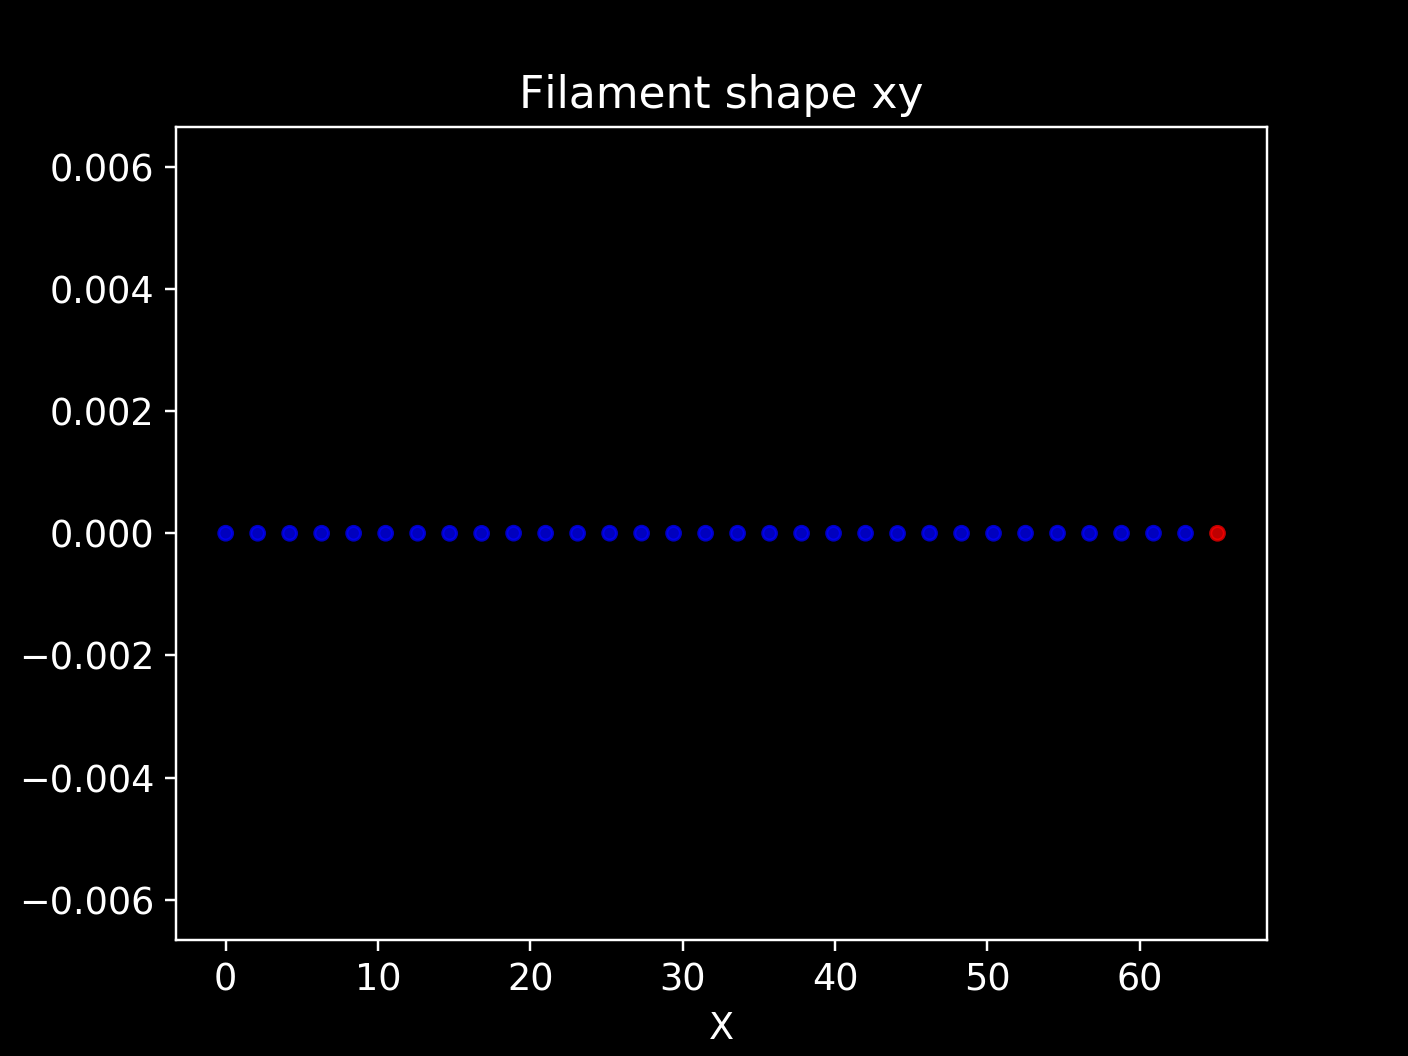

<IPython.core.display.Javascript object>


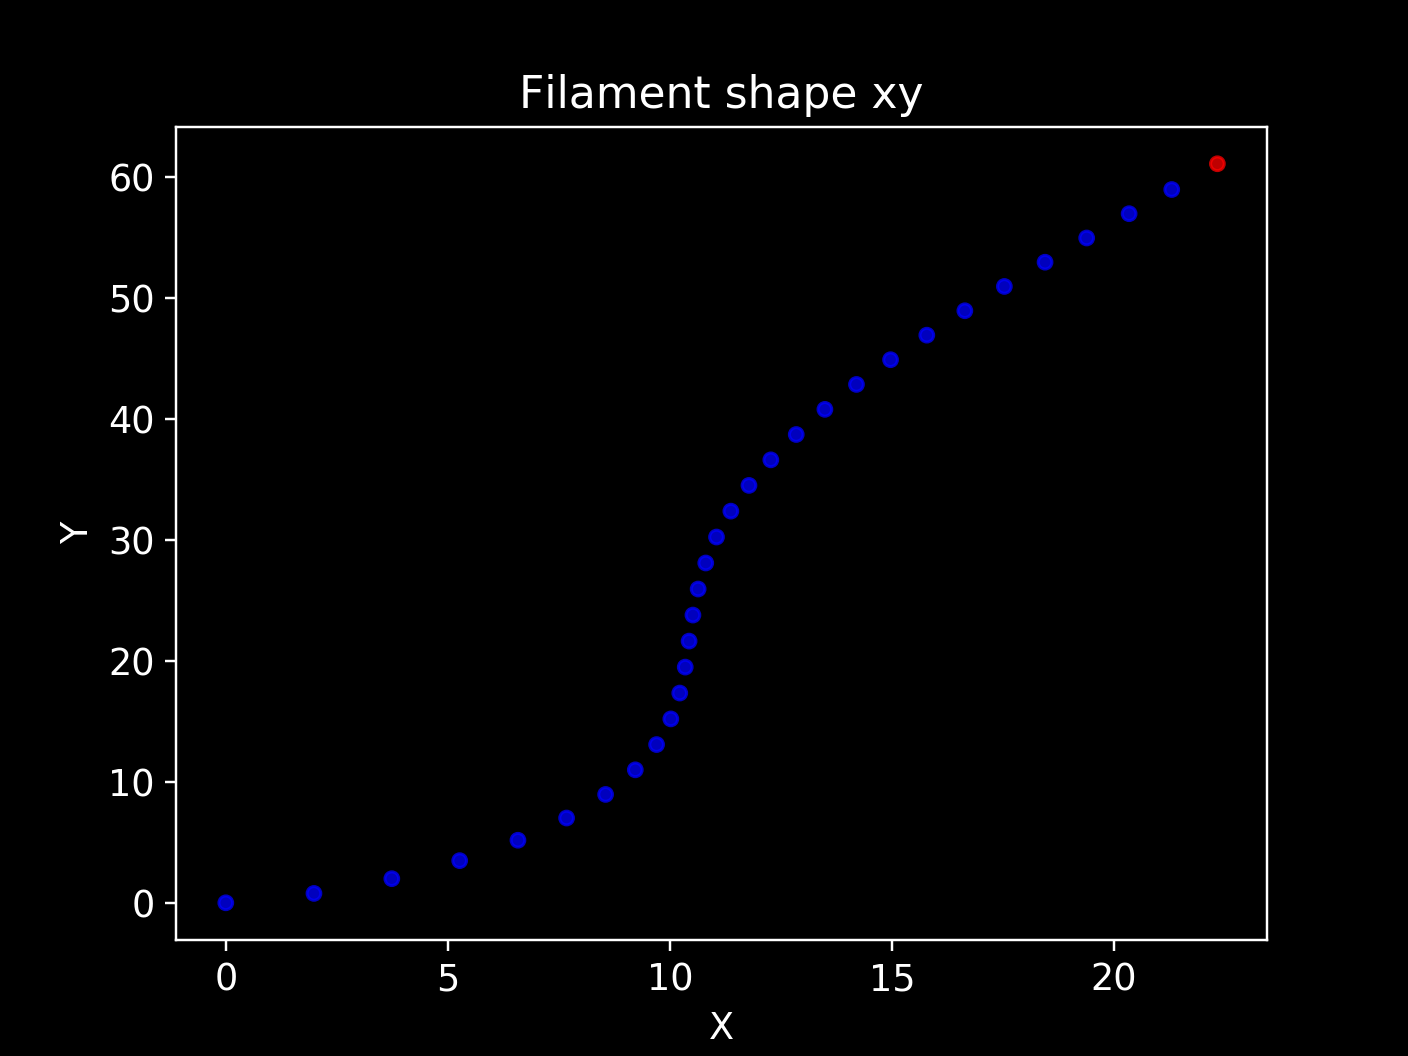

In [116]:
# Plot the initial filament shape
plt.figure()
filament.plotFilament(filament.R[0,:])
plt.figure()
filament.plotFilament(filament.R[1000,:])

In [89]:
# Calculate the filament length vs time

filament.compute_arc_length()

<IPython.core.display.Javascript object>


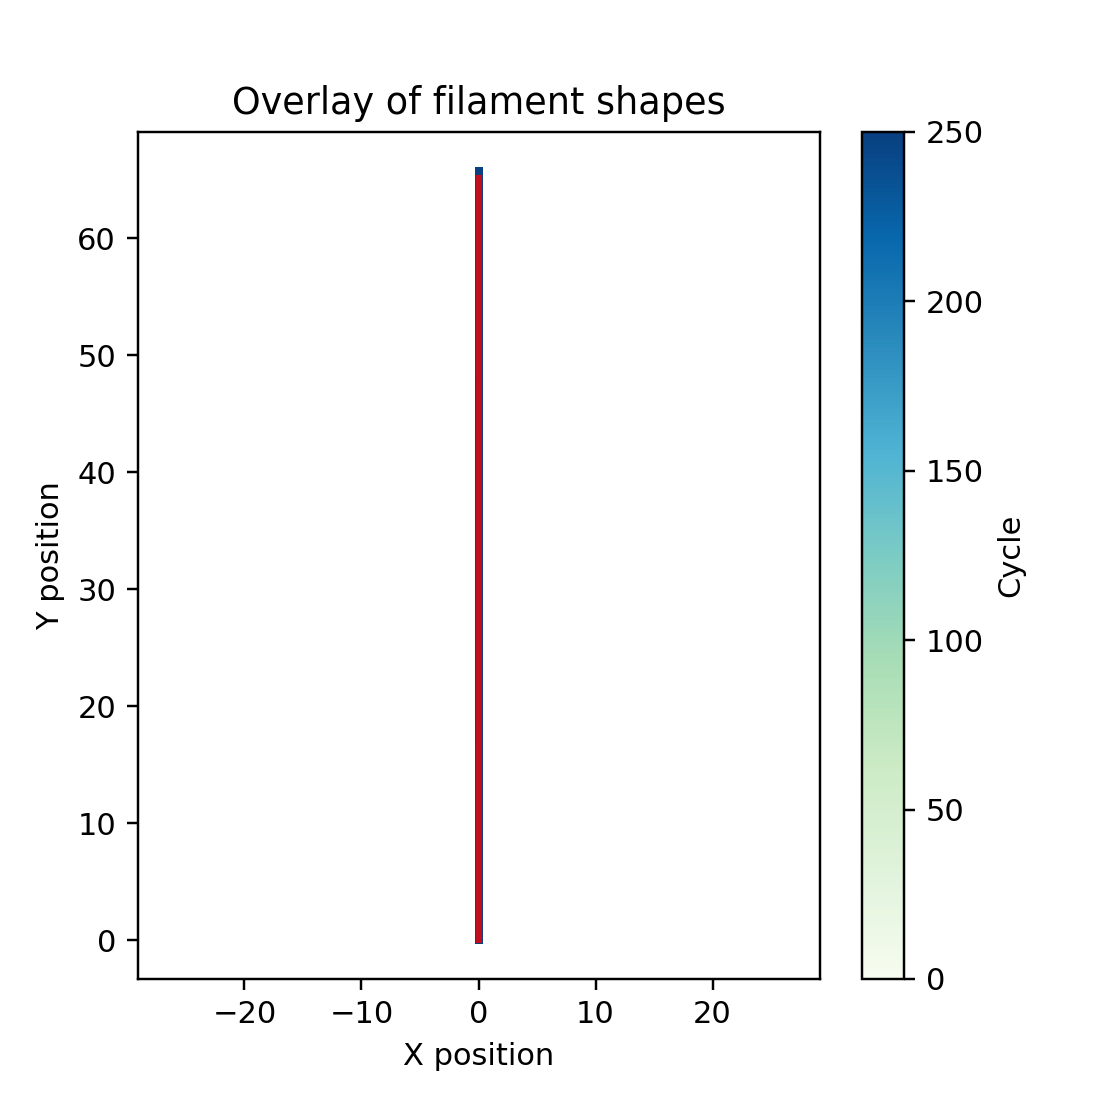

In [90]:
# Overlay of filament shapes
plt.style.use('default')
filament.plot_filament_centerlines(stride = 50, save = False, color_by = 'Cycle')

# Tip search-coverage and unique locations sampled


Calculating unique positions and count...
Total unique positions sampled by tip: 784.0
Total hits : 37501


<IPython.core.display.Javascript object>


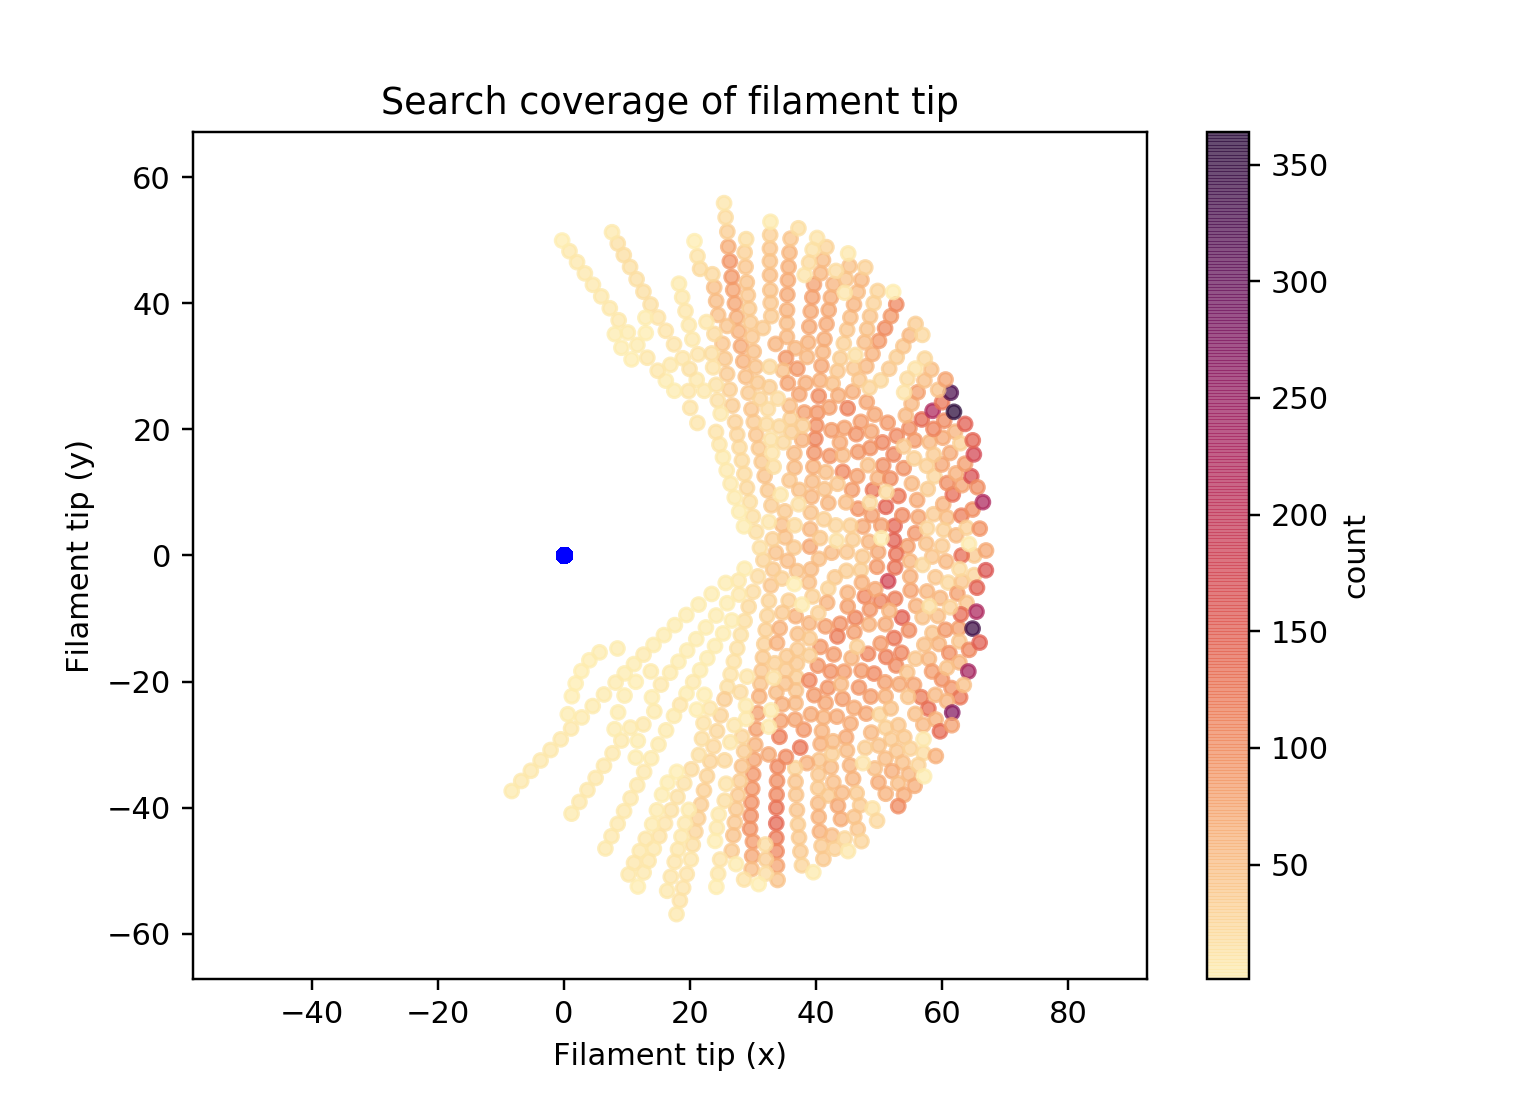

<IPython.core.display.Javascript object>


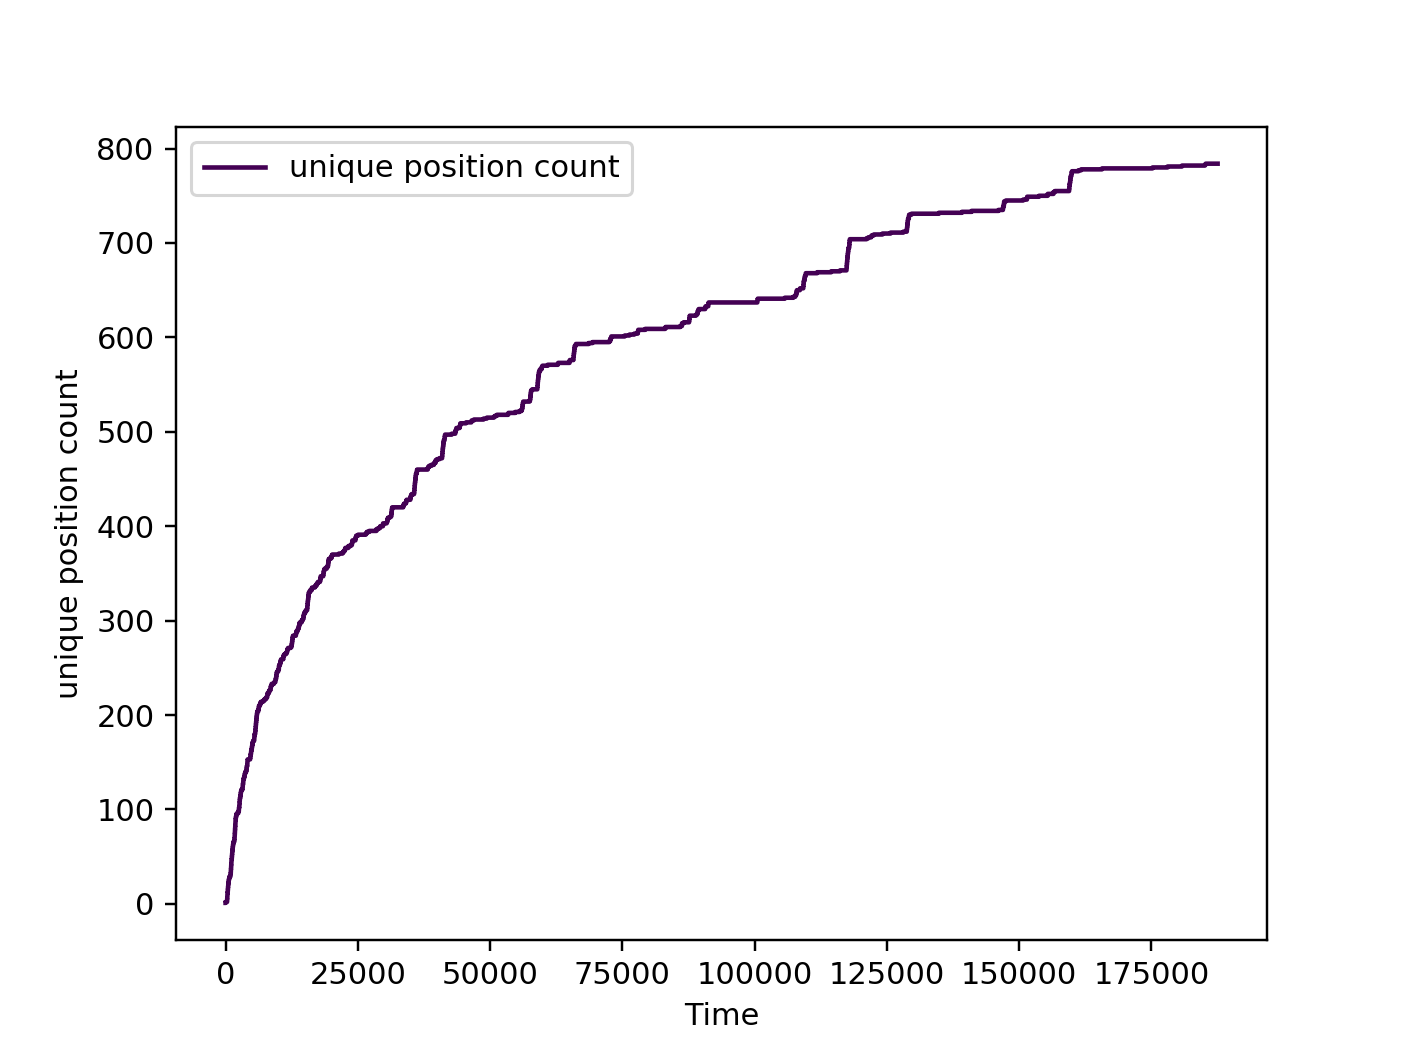

In [11]:
filament.filament_tip_coverage(save = False, overwrite = True)
plt.style.use('default')
filament.plot_unique_tip_locations(save = False)
filament.plot_timeseries(var = ['unique position count'], save = False)

## Alternate plotting method for search clouds

In [20]:
# Create a folder for storing Publication figures

publication_figures = '/home/deepak/Dropbox/LacryModeling/ActiveFilamentsManuscript/Figures'


# Set the values for the publication figure parameters
rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rc('text', usetex='false') 
rcParams.update({'font.size': 14})
sns.set(font_scale = 1)

file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-10-19/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.205128205128205_activityTime_750_simType_point/SimResults_00.hdf5'

filament = analysis.analysisTools(file = file)

plt.style.use('default')

filament.plot_tip_scatter_density(save = False, num_cycles=100, save_folder = publication_figures)

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 9.999733340444255
No:of particles : 32
No:of time points : 37501
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-10-19/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.205128205128205_activityTime_750_simType_point
Data file SimResults_00.hdf5
Tip scatter density plot


KeyboardInterrupt: 

# Unique positions sampled (prelim results)

- k = 30, Total unique positions sampled by tip: 257.0
- k = 40, Total unique positions sampled by tip: 211.0
- k = 50, Total unique positions sampled by tip: 436.0
- k = 70, Total unique positions sampled by tip: 1423.0
- k = 100, Total unique positions sampled by tip: 460.0

<IPython.core.display.Javascript object>


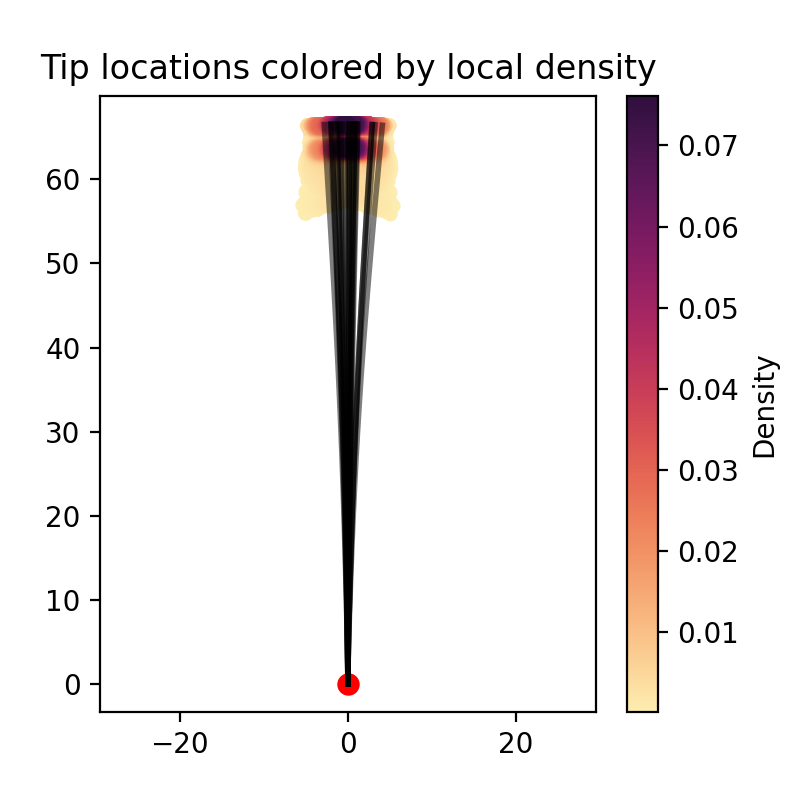

1875


In [47]:
from scipy.stats import gaussian_kde
import seaborn as sns
import cmocean

plt.style.use('default')


x = np.array(filament.derived_data['head pos x'])
y = np.array(filament.derived_data['head pos y'])
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig = plt.figure(figsize =(4,4))

# ax1 = sns.scatterplot(x = y, y = x, hue = z[::1], palette = cmocean.cm.matter, edgecolor = None, legend = False)

ax1 = plt.scatter(x = y, y = x, c = z, s = 20, edgecolor = None, cmap = cmocean.cm.matter)
plt.scatter(0,0,color='r', s= 50)
# plt.scatter(np.linspace(0,1,10),np.linspace(0,1,10))
plt.axis('equal')
cbar = plt.colorbar(ax1)
cbar.ax.set_ylabel('Density')
plt.title('Tip locations colored by local density')


# Filament shapes at constant phase

# Overlay filament center lines
stride = int(filament.Nt/20)
print(stride)
for ii in range(filament.Nt):
    filament.r = filament.R[ii,:]
    x = filament.r[0:filament.Np]
    y = filament.r[filament.Np:2*filament.Np]

    if(ii%stride==0):
        cf = plt.plot(y, x, color = 'k', linewidth = 2.0, alpha = 0.5)
       
plt.show()

# Search efficiency calculation

In [22]:
# calculate total distance travelled by filament tip
tip_disp_x = filament.derived_data['head pos x'][1:] - filament.derived_data['head pos x'][0:-1]
tip_disp_y = filament.derived_data['head pos y'][1:] - filament.derived_data['head pos y'][0:-1]

tip_distances = (tip_disp_x**2 + tip_disp_y**2)**(1/2)

cumulative_distance = np.sum(tip_distances)

print('Total distance travelled by tip: {}'.format(cumulative_distance))
    

Total distance travelled by tip: 42757.06694839648


In [24]:
total_unique_pos = np.array(filament.unique_counter_time)[-1]

print(total_unique_pos)

254.0


In [25]:
search_efficiency = total_unique_pos/cumulative_distance

print('Search efficiency: {}'.format(search_efficiency))

Search efficiency: 0.005940538444944146


# Tangent angle representation
We compute the coordinate-free tangent angle representation of the filament shape.

<IPython.core.display.Javascript object>


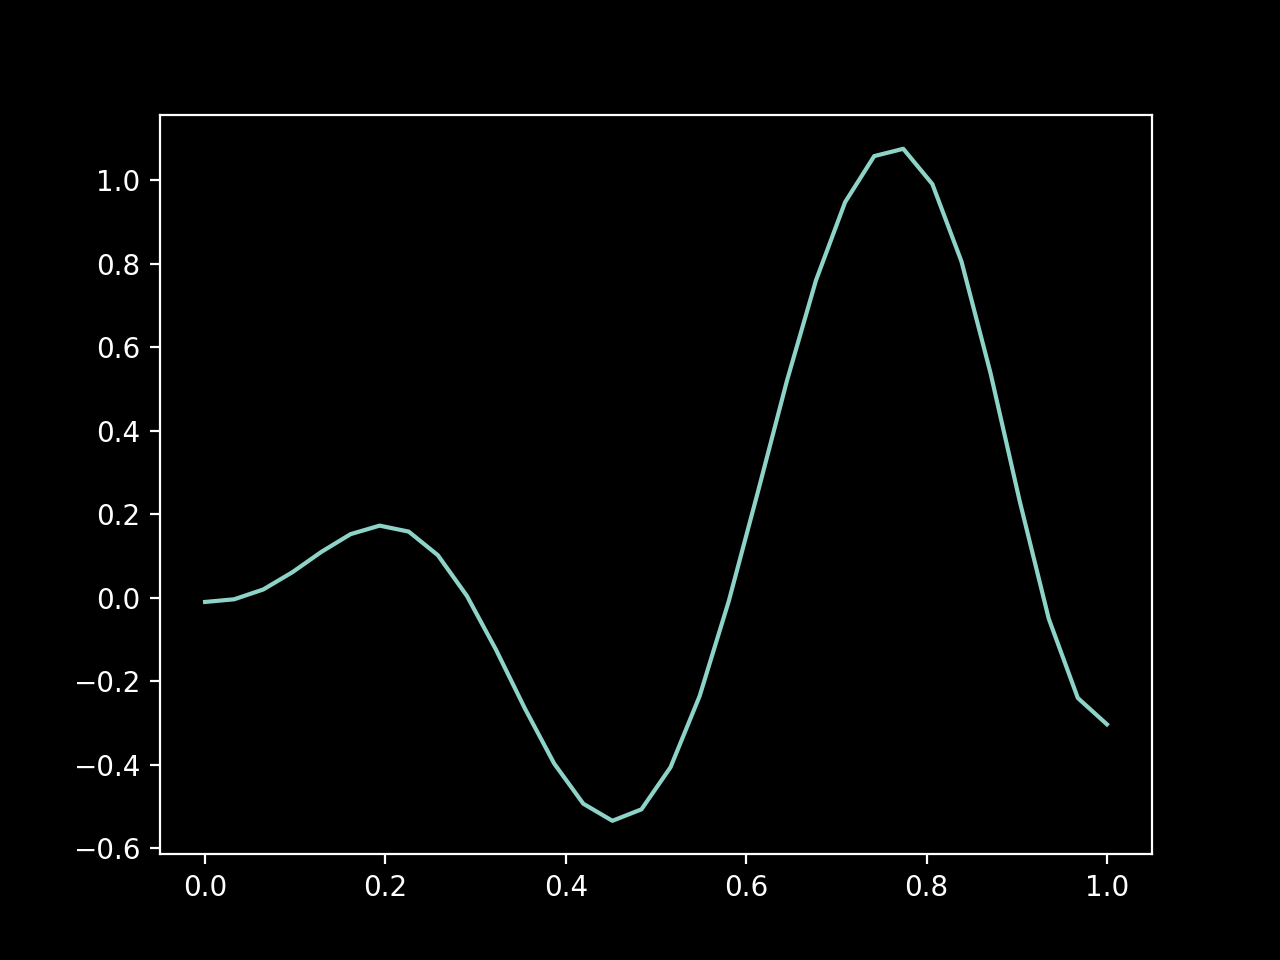

In [22]:
filament.r = filament.R[20, :]
filament.get_separation_vectors()
tangent_angles = filament.compute_tangent_angles()
arc_length_coordinate = np.linspace(0,1, filament.Np)


filament.plotFilament(r = filament.r)

plt.figure()
plt.plot(arc_length_coordinate, tangent_angles)
plt.show()

## 1. Compute the tangent angle matrix

In [117]:
# Compute the tangent angle matrix
# WARNING: RUN THIS BLOCK to further analysis based on tangent angles
filament.compute_tangent_angle_matrix()

<IPython.core.display.Javascript object>


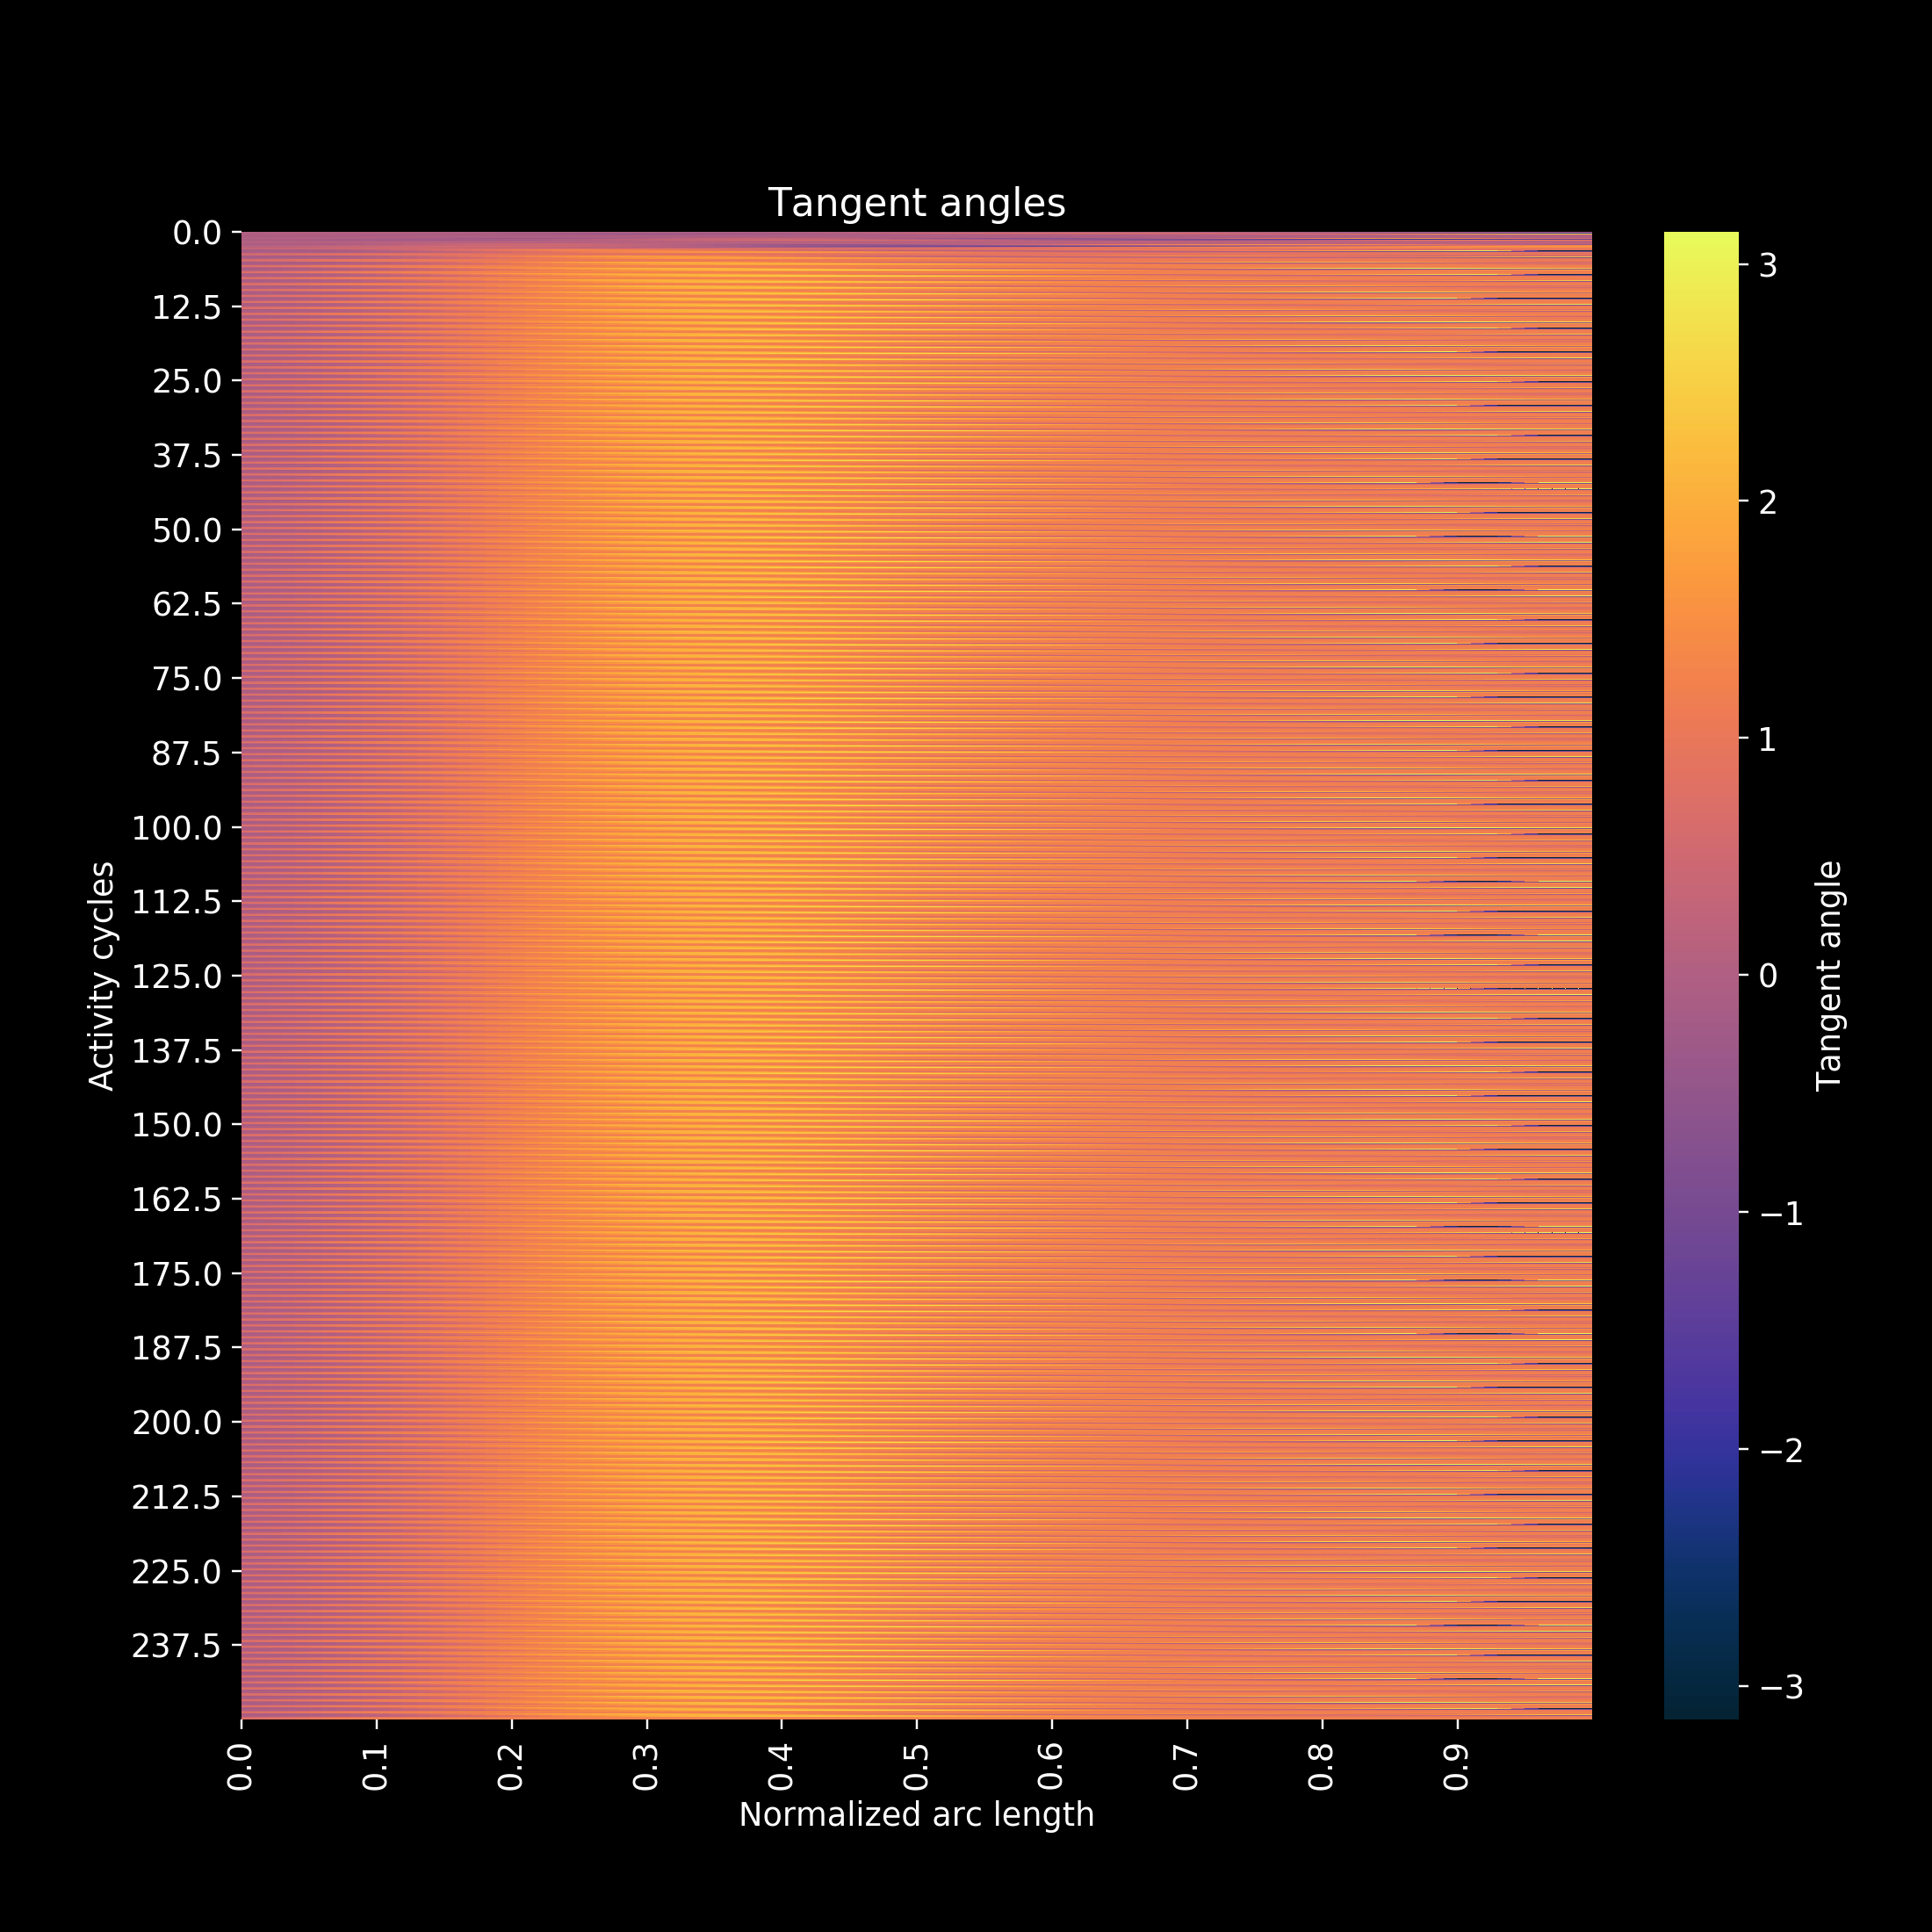

<IPython.core.display.Javascript object>


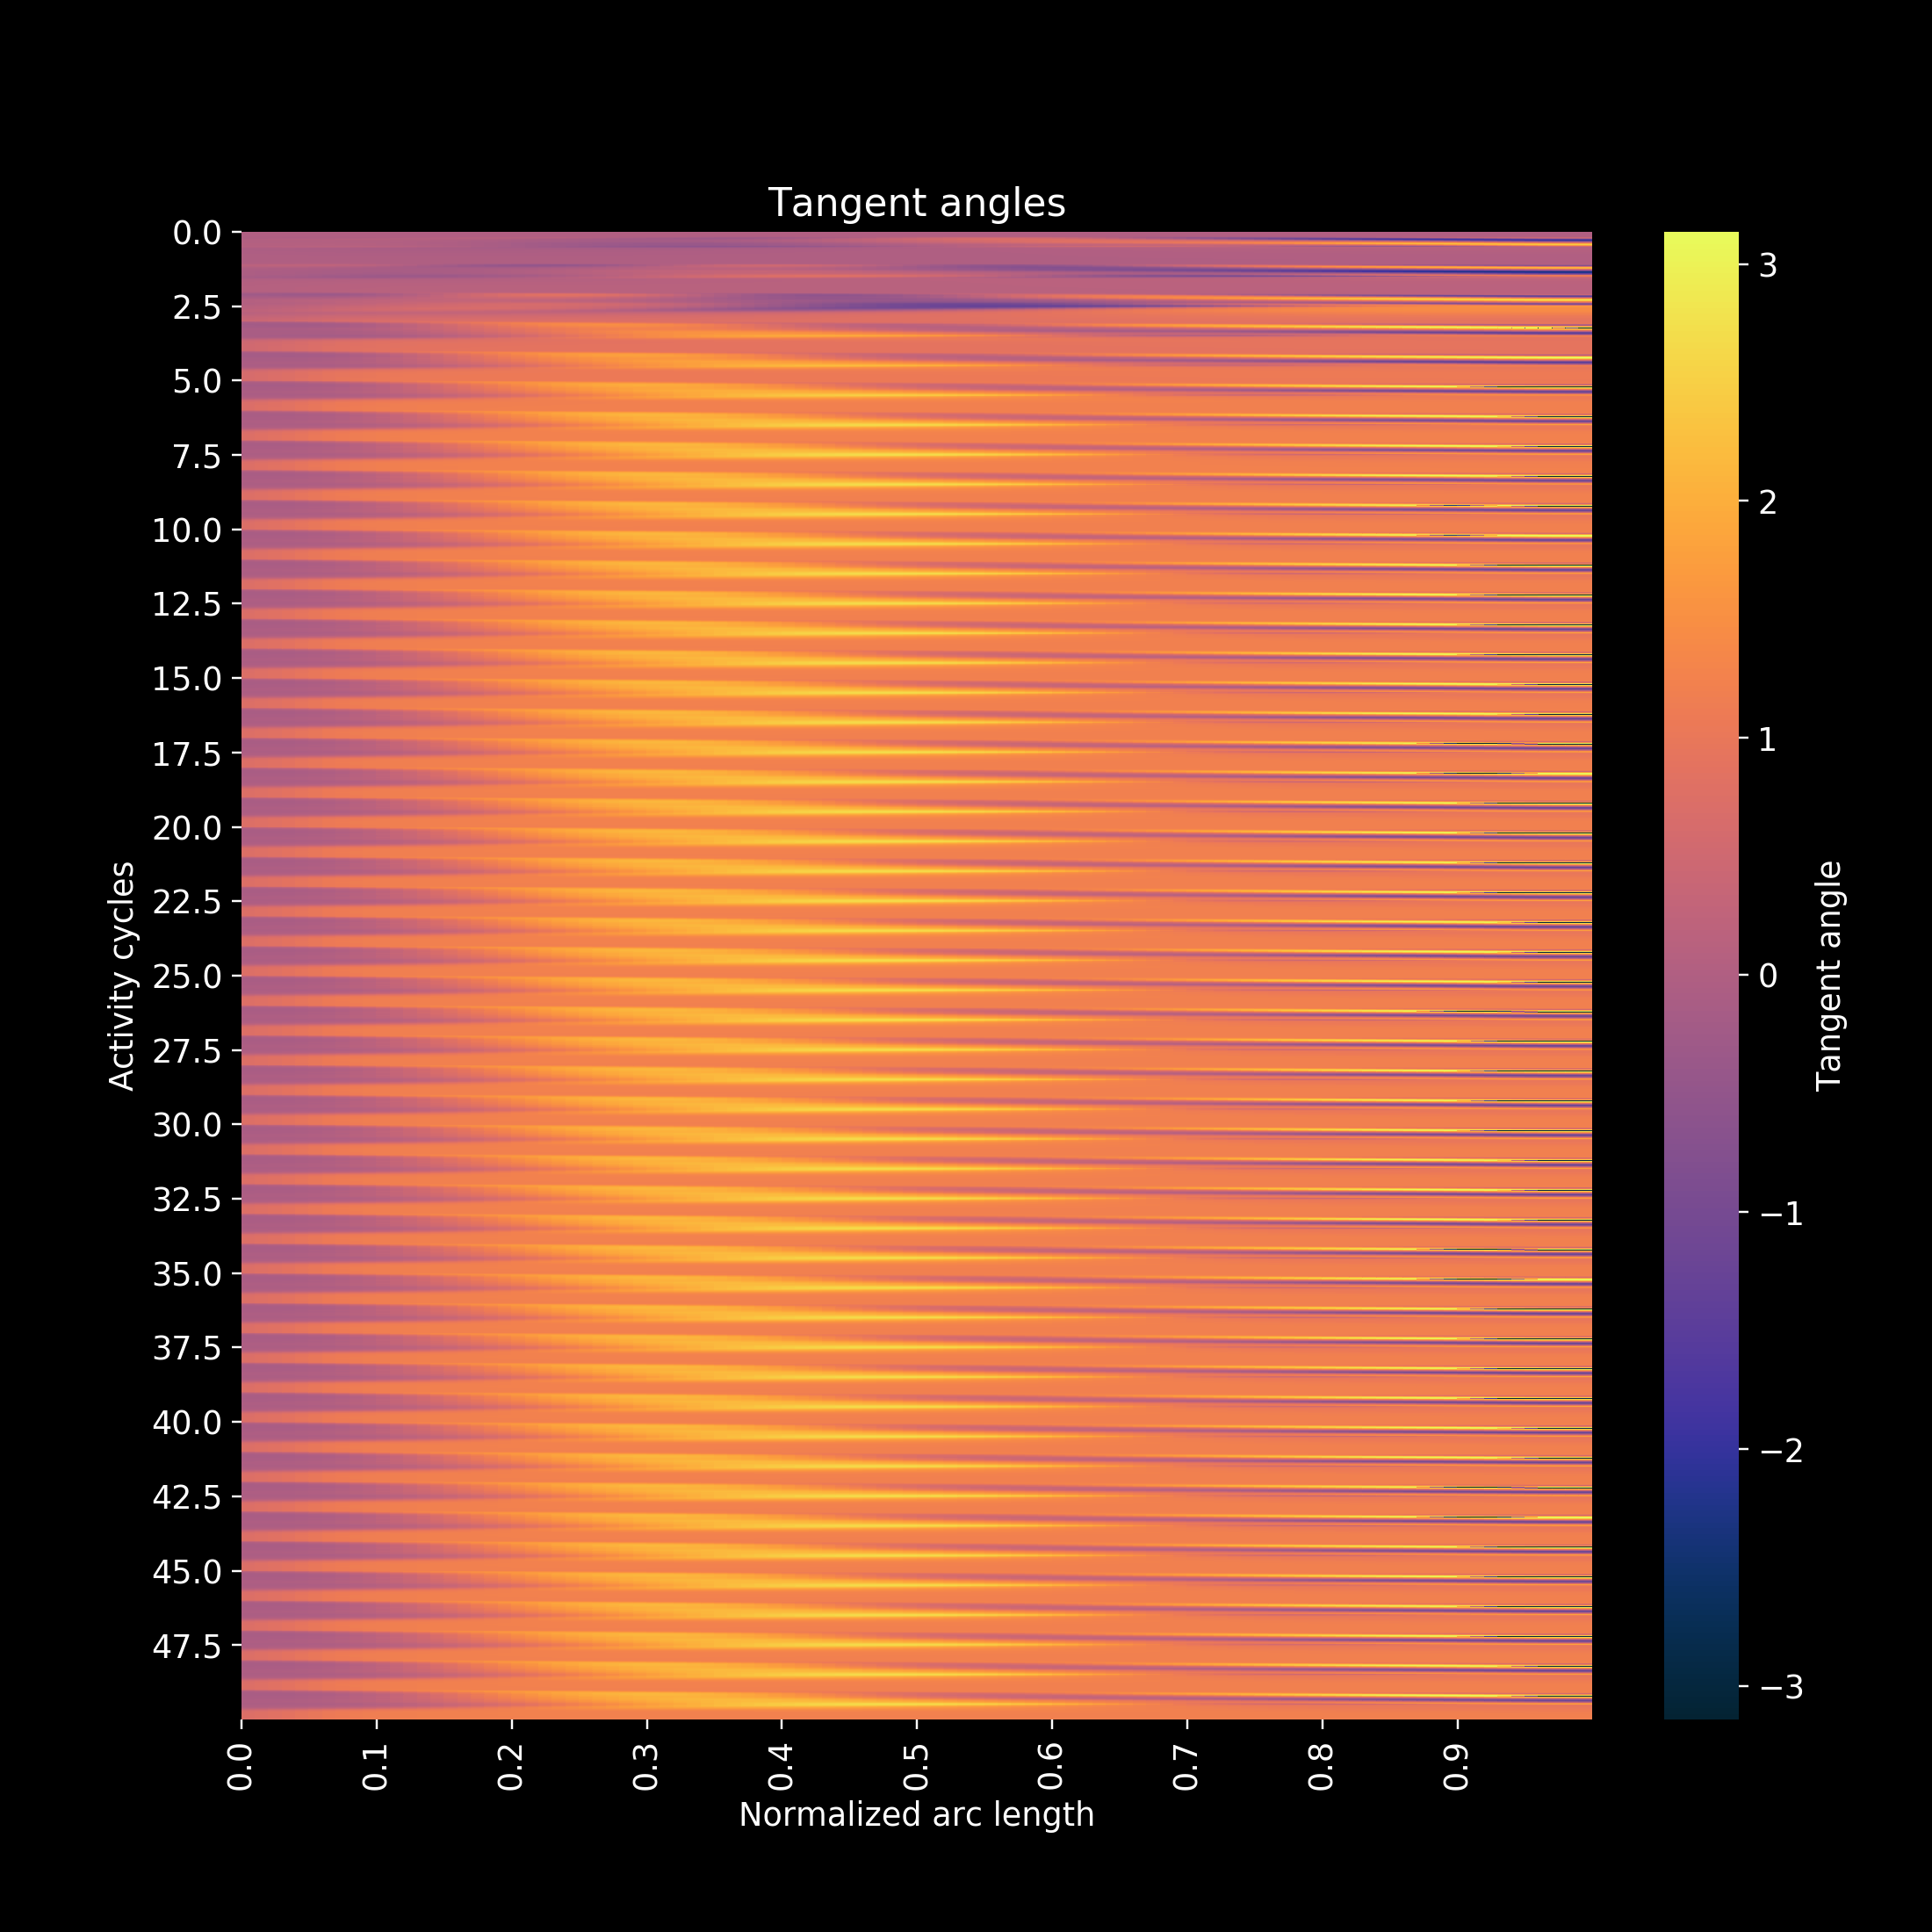

In [118]:
Tf = np.max(filament.Time)
plt.style.use('dark_background')
# Plot the tangent angle matrix
filament.plot_tangent_angle_matrix(save = False, start_time = 0, end_time = Tf)
filament.plot_tangent_angle_matrix(save = False, start_time = 0, end_time = 50*filament.activity_timescale )

## Tangent angle dynamics of the filament tip

<IPython.core.display.Javascript object>


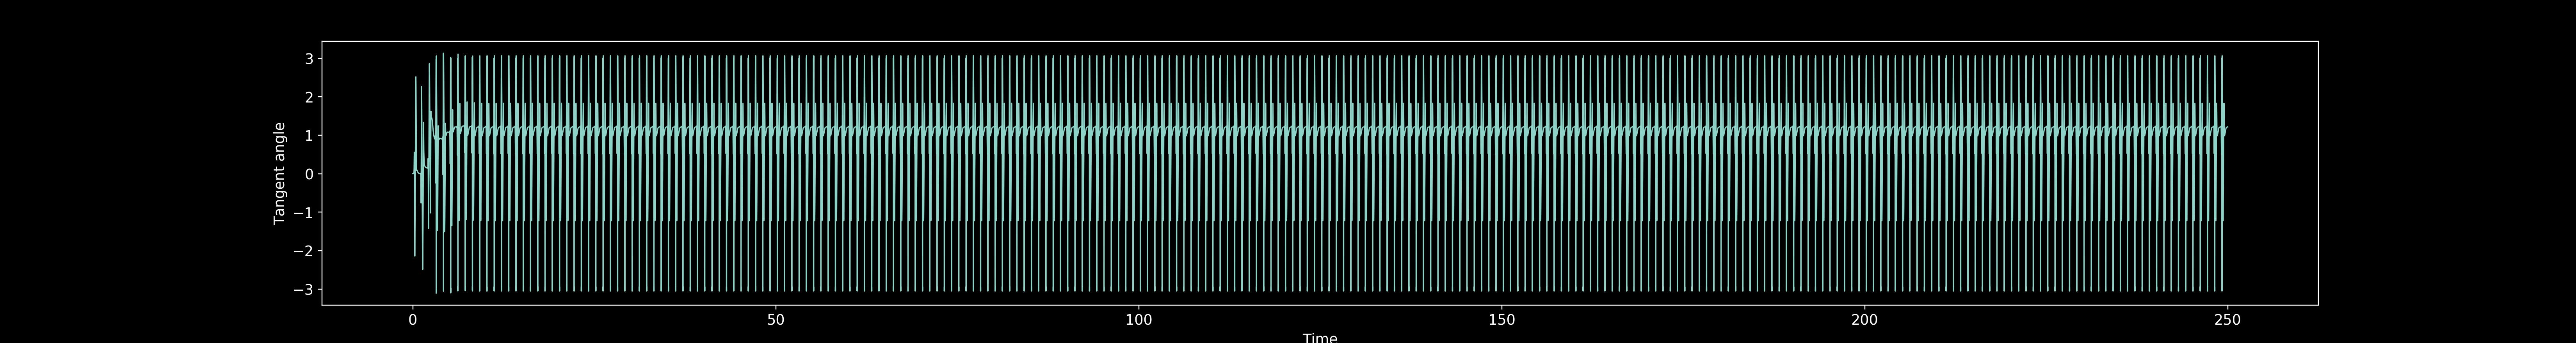

In [121]:
# Plot the tangent angle of the filament tip over time
time_array = range(int(filament.Nt))
plt.figure(figsize = (30,4))
plt.plot(filament.Time/filament.activity_timescale, filament.tangent_angles_matrix[:, -1], linewidth = 1)
plt.xlabel('Time')
plt.ylabel('Tangent angle')
ax = plt.gca()
# ax.set_aspect(1)
# plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'TangentAngle_At_Tip.png'), dpi = 300)
plt.show()

## 2. Shape covariance and PCA

No:of spatial points: 100
No:of time points: 36001
(36001, 100)
(36001, 100)


<IPython.core.display.Javascript object>


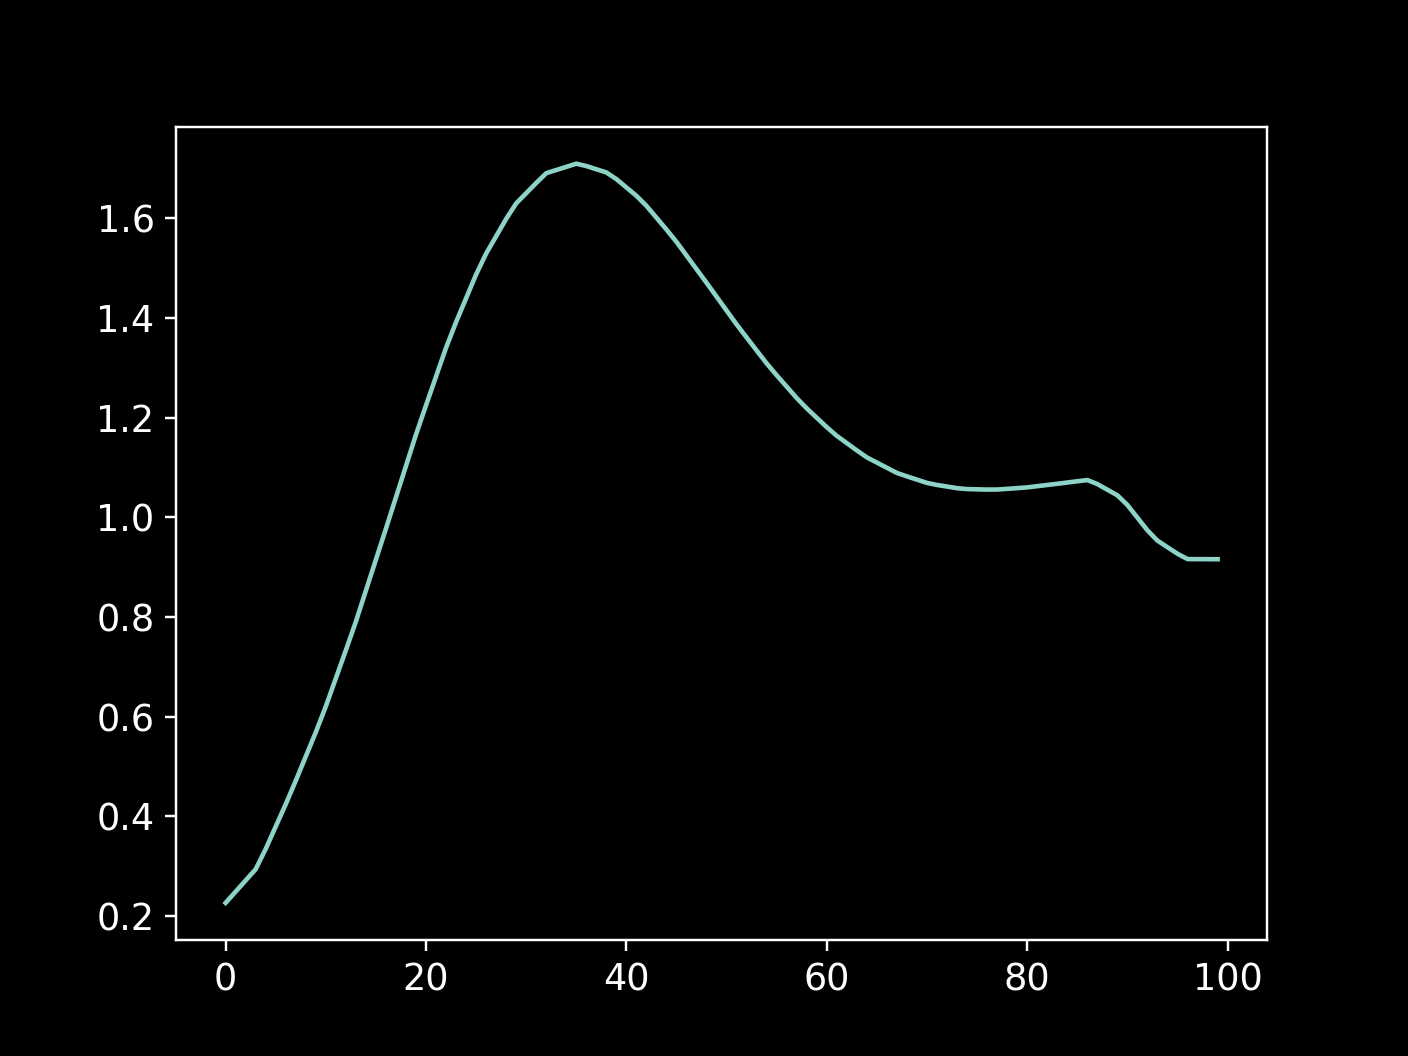

<IPython.core.display.Javascript object>


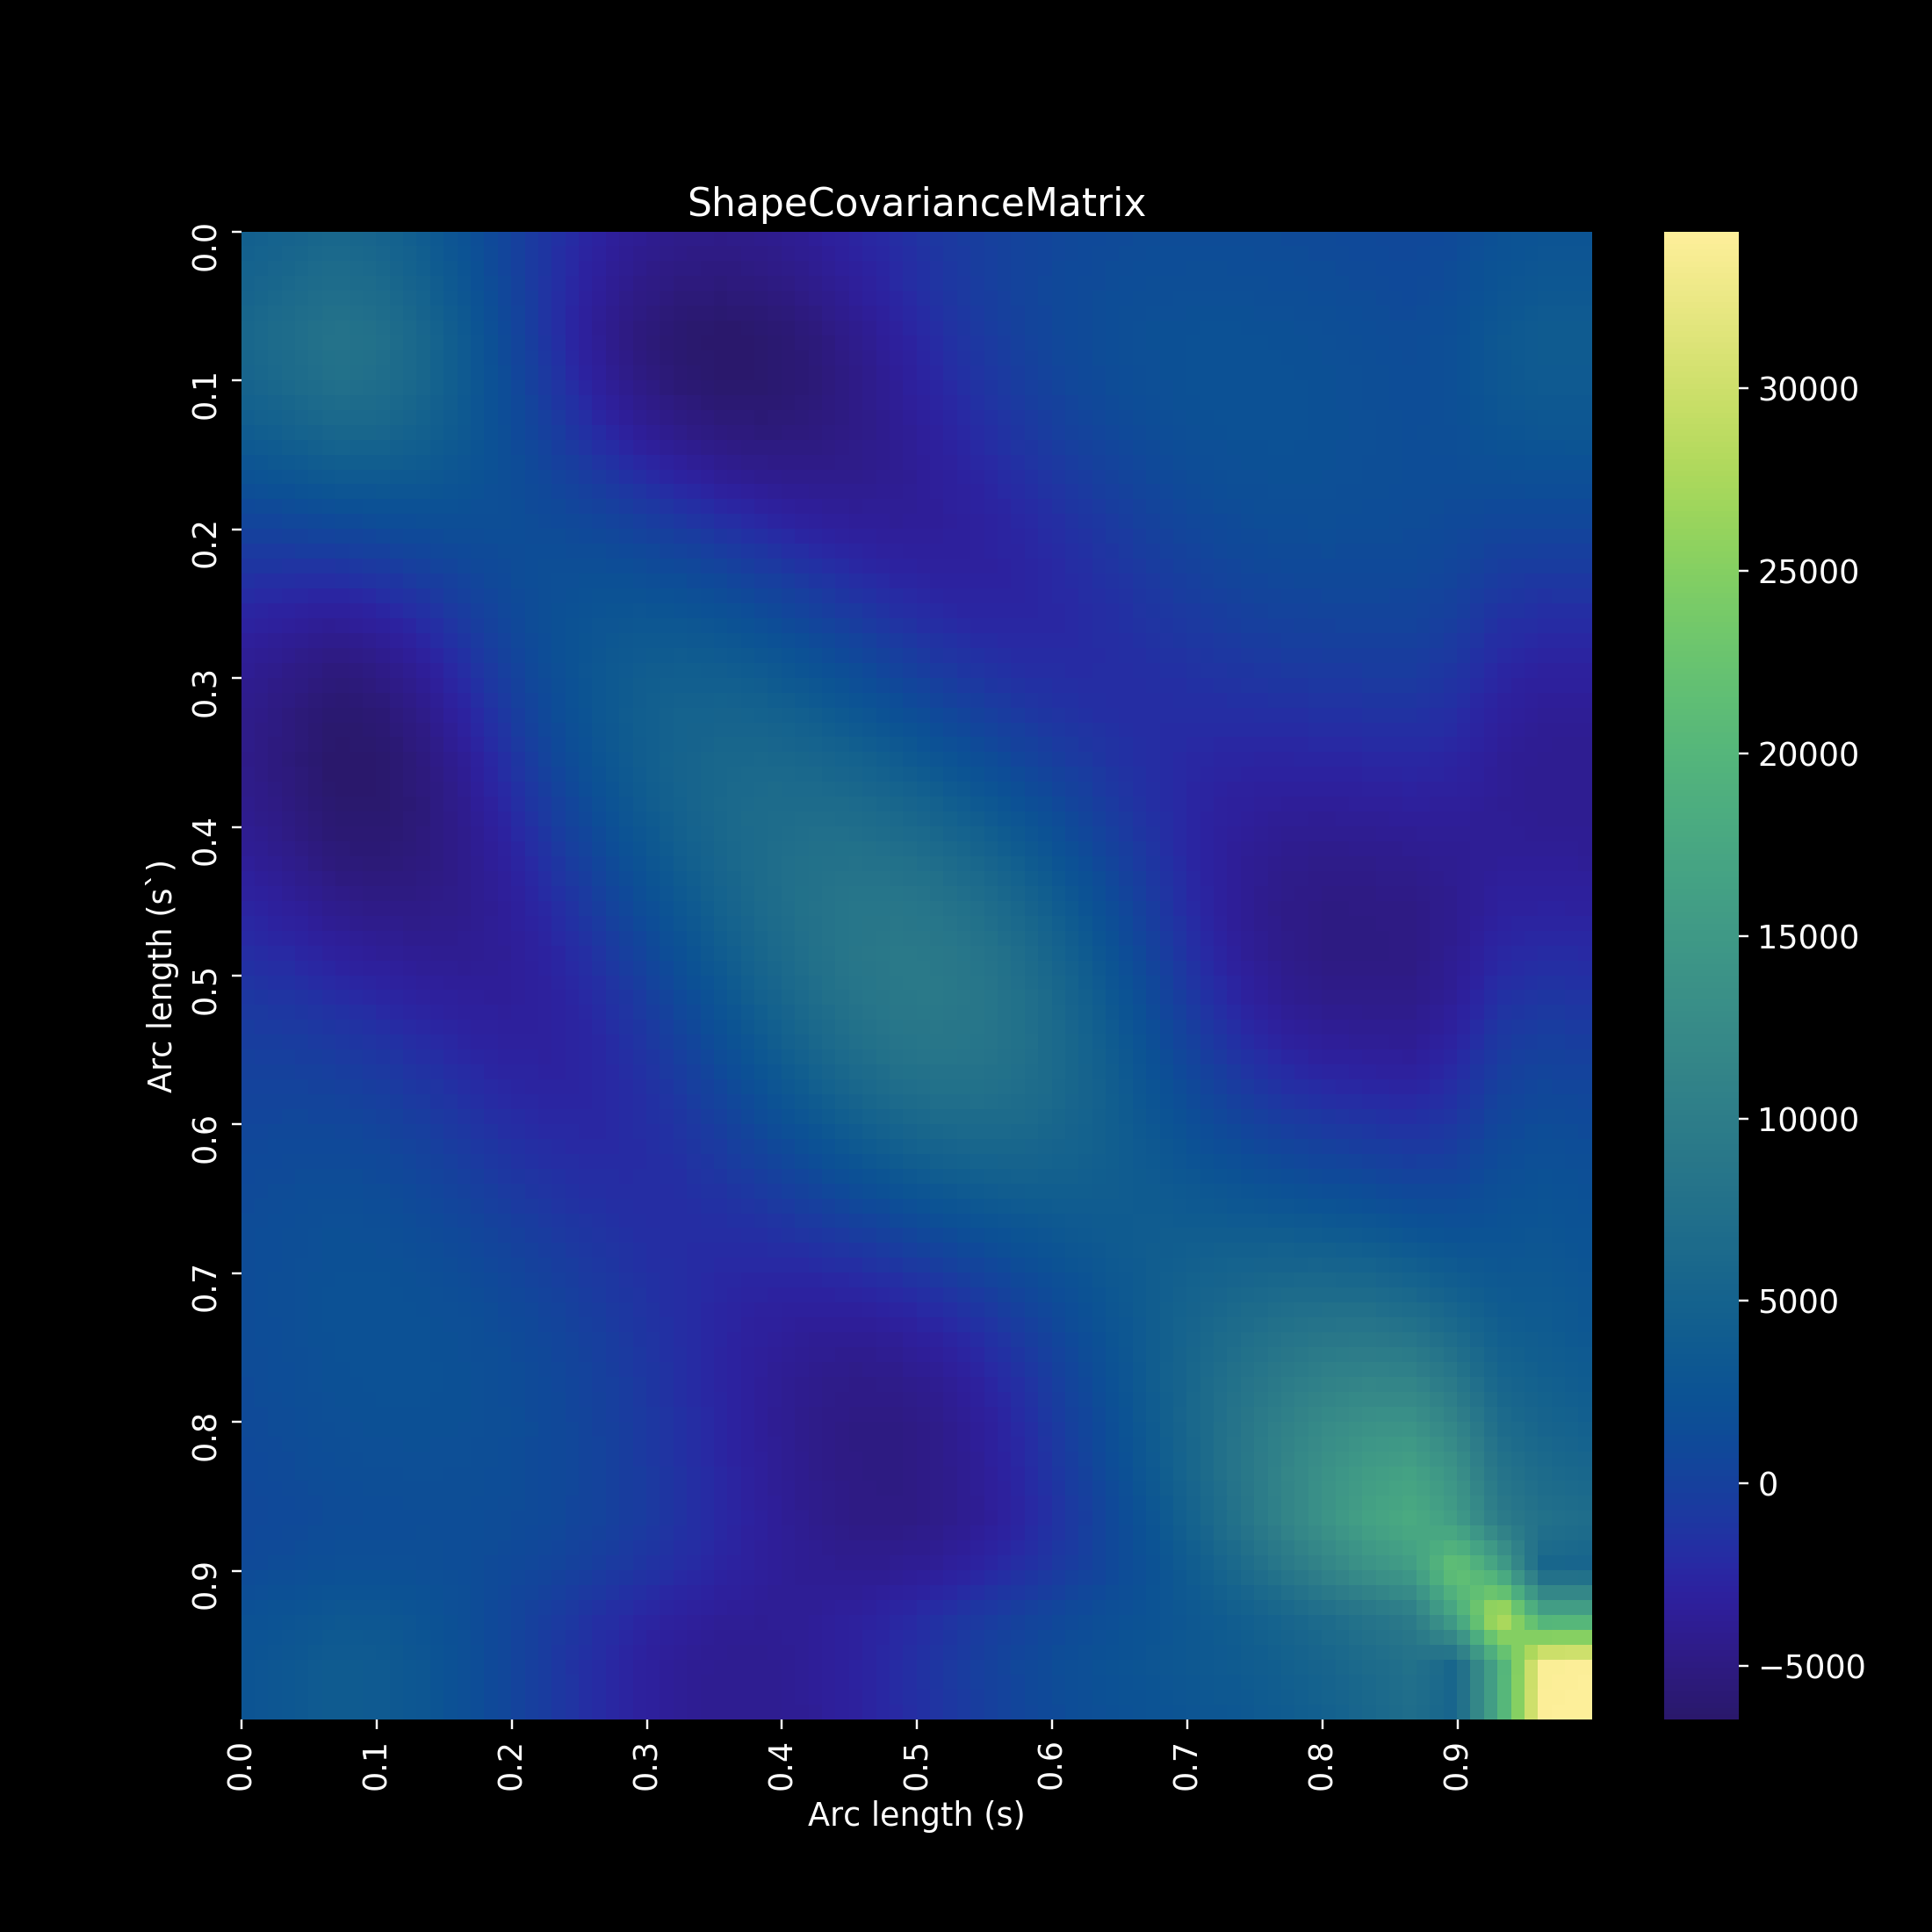

In [122]:
# Compute the shape covariance matrix
# WARNING: Execute this block before PCA 

start_cycle = 10 # Ignore the first 10 cycles to remove transients

start_time = start_cycle*filament.activity_timescale

start_index = next((i for i,x in enumerate(filament.Time) if x>= start_time), 0)

# Ignore the transients in the simulation
filament.tangent_angles_matrix = filament.tangent_angles_matrix[start_index:,:]


filament.compute_shape_covariance_matrix()

# Plot the mean tangent angle vector
plt.figure()
plt.plot(filament.phi_0)
plt.show()

filament.plot_shape_covariance_matrix(save = False)

## 3. Eigen-decompisition of the covariance matrix

In [94]:
# d, v = np.linalg.eigh(filament.covariance_matrix)



No:of eigenvalues to explain 95 perc of variance: 5


<IPython.core.display.Javascript object>


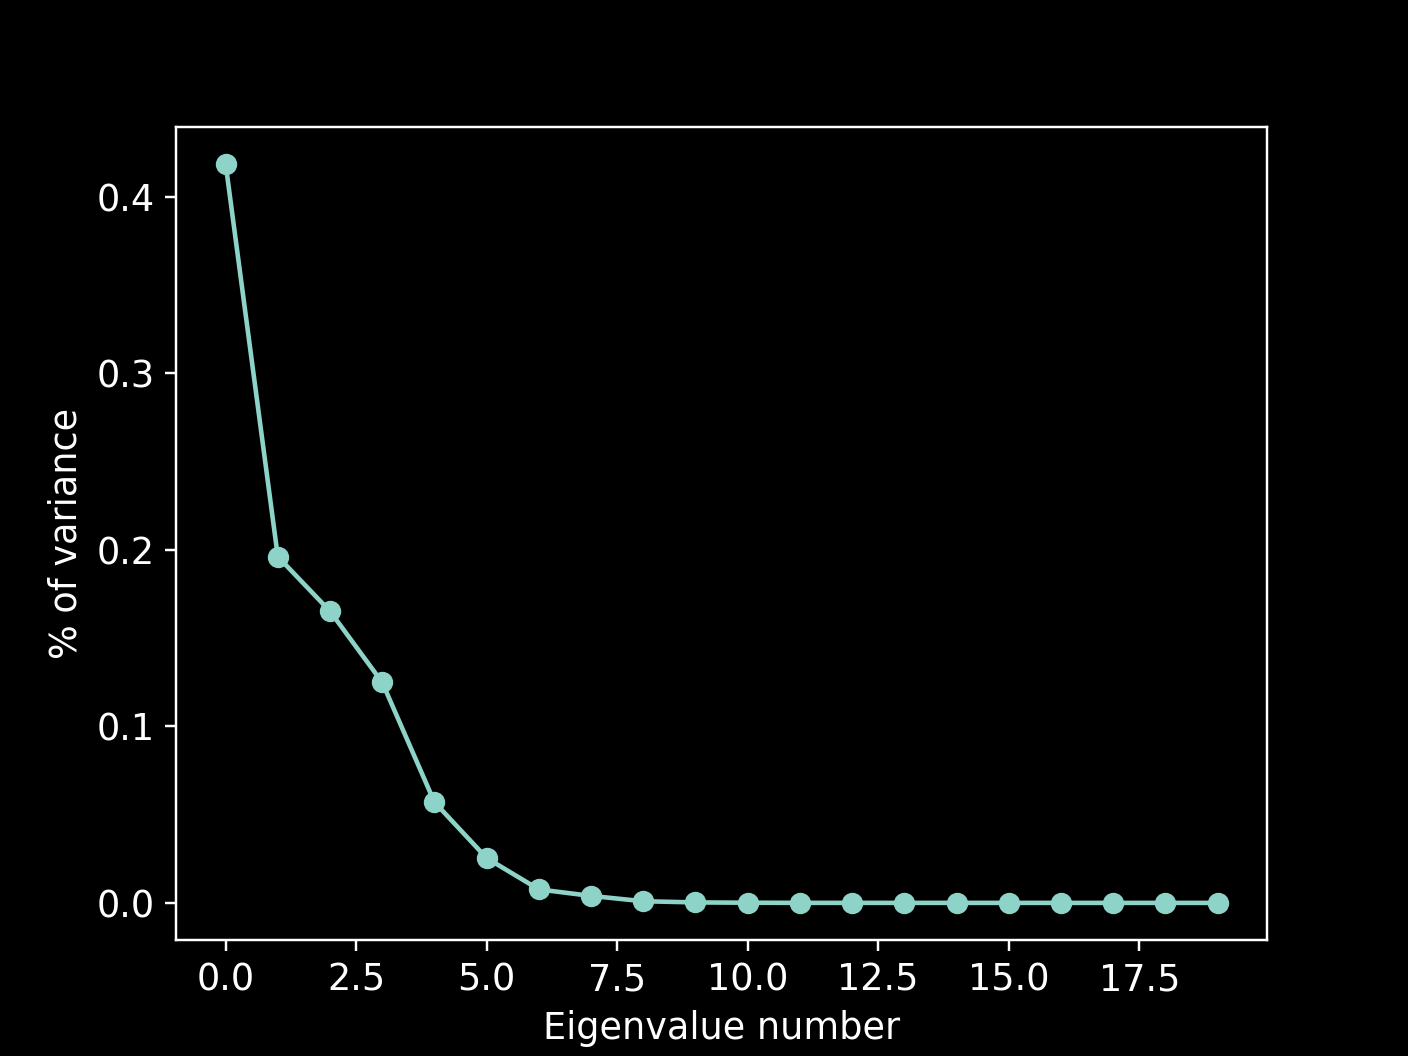

NameError: name 'n_sig_eigenvalues' is not defined

In [123]:
# Plot the eigenvalue spectrum
# idx_sorted = np.argsort(-np.real(d))
# d_sorted = np.real(d[idx_sorted])

# d_normalized = d_sorted/np.sum(d_sorted)

d_sig, eigenvectors_sig, d_normalized = filament.matrix_eigen_decomposition(filament.covariance_matrix)

plt.figure()
plt.plot(d_normalized[0:20], marker = 'o')
plt.xlabel('Eigenvalue number')
plt.ylabel('% of variance')
# plt.title('Eigenvalue spectrum')
plt.title('variance explained by first {} eigenvalues: {} %'.format(filament.n_sig_eigenvalues, round(100*np.sum(d_normalized[0:n_sig_eigenvalues]))))
# plt.savefig(os.path.join(file_path, 'EigvalueSpectrum.png'), dpi = 300)
plt.show()

print('% of variance explained by first {} eigenvalues: {}'.format(filament.n_sig_eigenvalues, 100*np.sum(d_normalized[0:n_sig_eigenvalues])))


# Dimensionality estimate based on Participation Ratio

$D_{PCA} = (\sum_{i=1}^N \mu_i)^2/(\sum_{i=1}^N \mu_i^2))$



In [124]:
Dim_PCA = np.sum(filament.eigenvalues_sorted)**2/(np.sum(filament.eigenvalues_sorted**2))

print('Dimensionality based on participation ratio: {}'.format(Dim_PCA))

Dimensionality based on participation ratio: 3.8385952282029336


In [17]:
# Find number of eigenvalues needed to explain 95% of variance
N_eigvalues = 10

for n_eig in range(N_eigvalues):

    perc_var = 100*np.sum(d_normalized[0:n_eig])

    if(perc_var>=95):
        break

print('No:of eigenvalues to explain {} perc of variance: {}'.format(95, n_eig))

No:of eigenvalues to explain 95 perc of variance: 3


In [96]:
# # Eigenvectors corresponding to the sorted eigenvalues
# eigenvectors_sorted = v[:, idx_sorted]

# eigenvectors_sig = eigenvectors_sorted[:,0:n_sig_eigenvalues]

# print(eigenvectors_sorted)

[[-0.00339304  0.03285372  0.0029831  ...  0.         -0.02972297
   0.6199566 ]
 [-0.00381034  0.03601371  0.00313415 ... -0.01801164  0.30450082
  -0.57913367]
 [-0.00422763  0.0391737   0.0032852  ...  0.03101827 -0.4802325
  -0.33008446]
 ...
 [ 0.16961858 -0.1090031  -0.10462826 ...  0.32344211 -0.0295385
   0.00321534]
 [ 0.16946999 -0.11109163 -0.10429878 ... -0.14373271 -0.09980446
   0.04666259]
 [ 0.16932141 -0.11318015 -0.10396931 ... -0.05750405  0.09872412
  -0.02992038]]


<IPython.core.display.Javascript object>


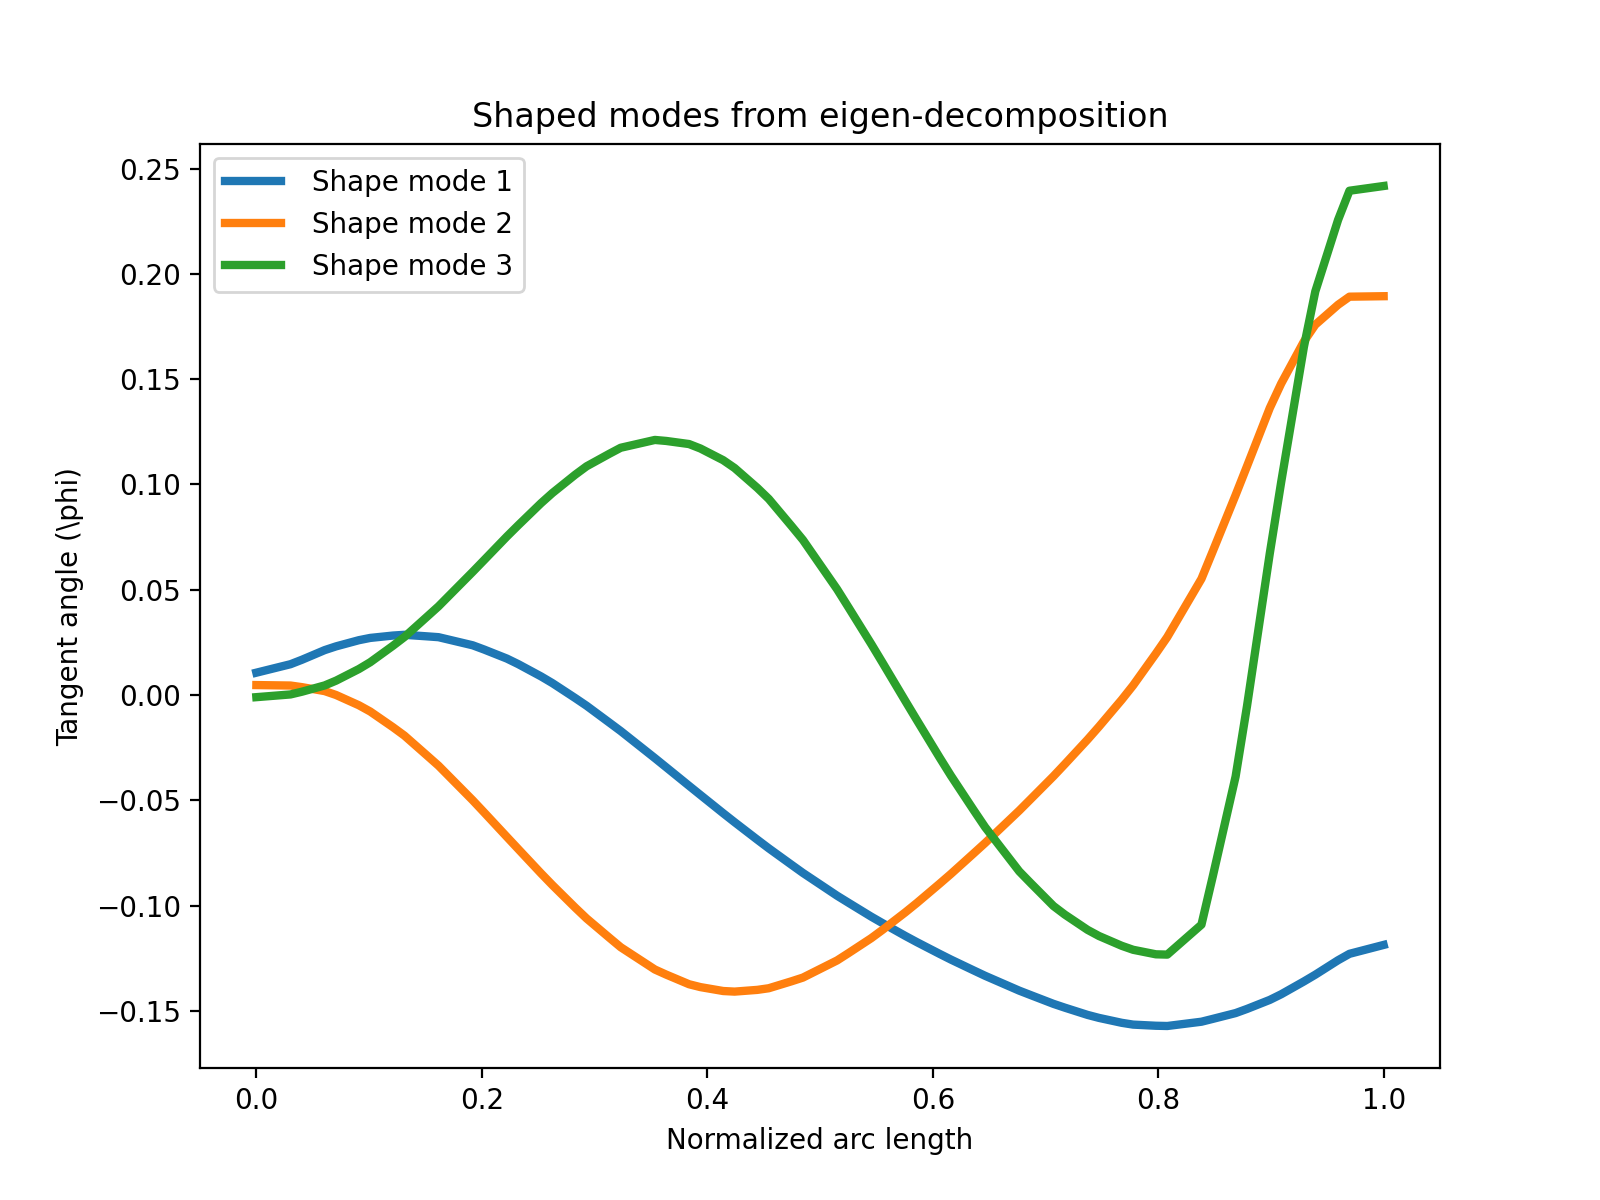

In [21]:
# # Shapes corresponding to the eigenvectors
# plt.figure(figsize = (8,6))
# length_array = np.linspace(0, 1, len(eigenvectors_sig[:,0]))
# for ii in range(n_sig_eigenvalues):
    
#     plt.plot(length_array, eigenvectors_sorted[:, ii], label =' Shape mode {}'.format(ii+1), linewidth = 3)
    
# plt.xlabel('Normalized arc length')
# plt.ylabel('Tangent angle (\phi)')
# plt.title('Shaped modes from eigen-decomposition')
# plt.legend()
# # plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'_ShapedModes.png'), dpi = 300)
# # plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'_ShapedModes.svg'), dpi = 300)

# plt.show()

filament.plot_shape_modes(save = False)

In [ ]:
# Testing the Class functions for the shape mode transformation.



## 4. Projection of general filament shape onto the shape modes


In [23]:
# from tqdm import tqdm
# import pandas as pd

# n_times, n_points = np.shape(filament.tangent_angles_matrix)
# mode_amplitudes = np.zeros((n_times, n_sig_eigenvalues))
# print(n_times, n_points)

# matrix_A = eigenvectors_sig # n_points x n_eigvalues
# matrix_A_inv = np.linalg.pinv(matrix_A)

# for ii in tqdm(range(n_times)):

#     rhs = filament.variance_matrix[ii, :]
    
    
#     amplitudes_lst_sq = np.matmul(matrix_A_inv, rhs) # 
    
#     for jj in range(n_sig_eigenvalues):
#         mode_amplitudes[ii, jj] = amplitudes_lst_sq[jj]

# filament.derived_data['mode 1 amplitude'] = mode_amplitudes[:,0]
# filament.derived_data['mode 2 amplitude'] = mode_amplitudes[:,1]
# filament.derived_data['mode 3 amplitude'] = mode_amplitudes[:,2]

filament.project_filament_shapes()

## 5. Save the mode amplitude time-series


In [24]:
# df_dict = {}
# df_dict['Time'] = filament.Time

# for ii in range(n_sig_eigenvalues):
    
#     df_dict['Mode {} amplitude'.format(ii+1)] = mode_amplitudes[:,ii]
    
# df_mode_amplitudes = pd.DataFrame(df_dict)
# print(df_mode_amplitudes)

# df_mode_amplitudes.to_csv(os.path.join(file_path, filament.dataName[:-5]+'_ModeAmplitudes.csv'))

filament.save_mode_amplitudes()

<IPython.core.display.Javascript object>


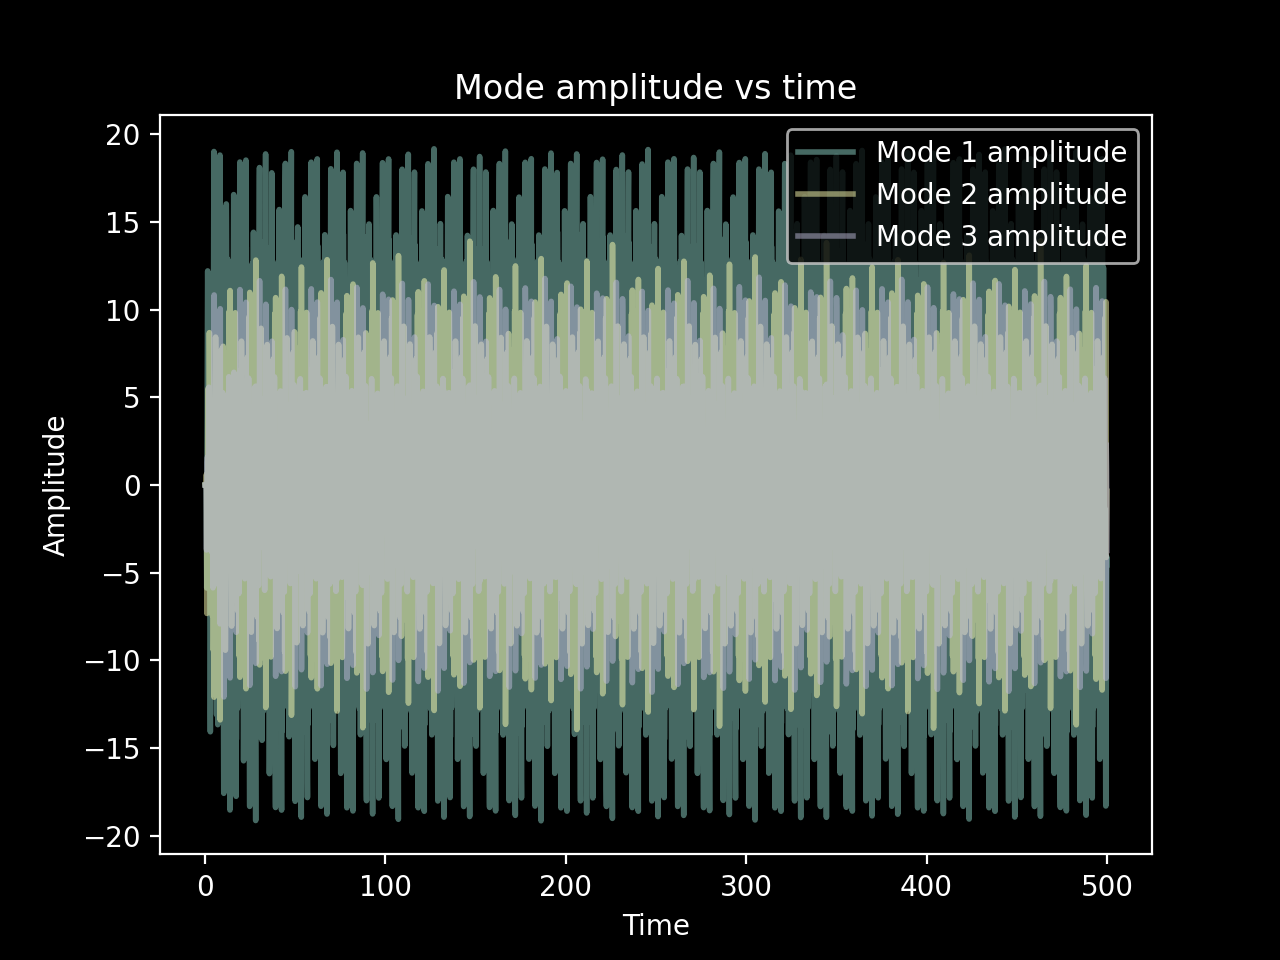

In [13]:
# Plot the dynamics of the mode amplitudes over time

plt.figure()

for ii in range(n_sig_eigenvalues):
    plt.plot(filament.Time/filament.activity_timescale, filament.mode_amplitudes[:,ii],linewidth = 2, label = 'Mode {} amplitude'.format(ii+1), alpha = 0.5)
    
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Mode amplitude vs time')
plt.legend()
plt.show()

    


<IPython.core.display.Javascript object>


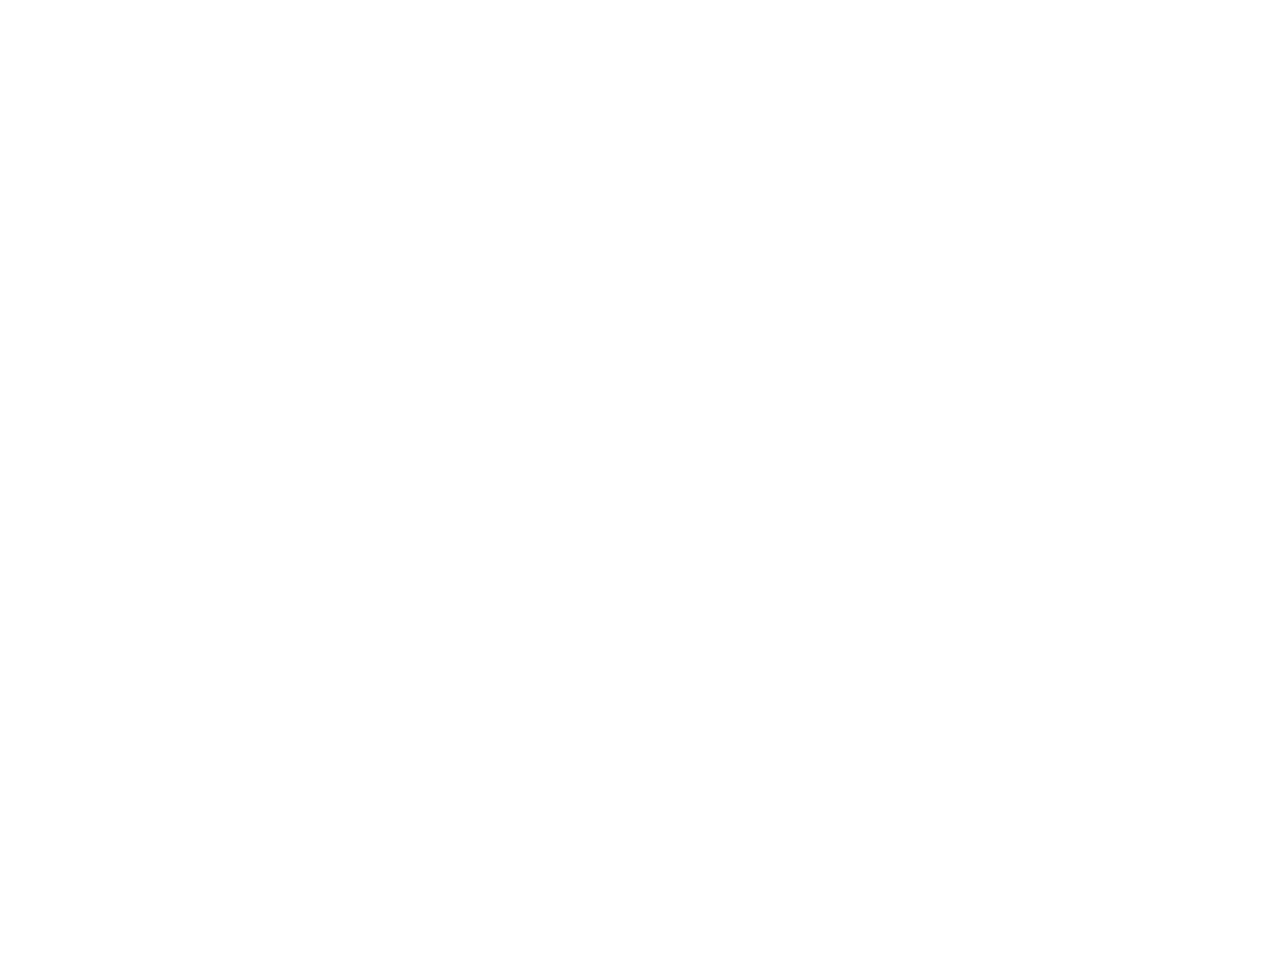

NameError: name 'mode_amplitudes' is not defined

In [11]:
# Scatter-plots to visualize the phase dynamics
plt.style.use('default')

plt.figure()
ax1 = plt.scatter(mode_amplitudes[int(filament.Nt/2):,0], mode_amplitudes[int(filament.Nt/2):,1], 5, c = filament.Time[int(filament.Nt/2):], alpha = 0.5)
plt.xlabel('Mode 1 amplitude')
plt.ylabel('Mode 2 amplitude')
cbar = plt.colorbar(ax1)
cbar.ax.set_ylabel('Time')
plt.title('Mode 2 vs Mode 1 amplitude')
plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'Mode2vsMode1.png'), dpi = 300)

plt.show()

plt.figure()
ax1 = plt.scatter(mode_amplitudes[int(filament.Nt/2):,0], mode_amplitudes[int(filament.Nt/2):,2], 5, c = filament.Time[int(filament.Nt/2):], alpha = 0.5)
plt.xlabel('Mode 1 amplitude')
plt.ylabel('Mode 3 amplitude')
cbar = plt.colorbar(ax1)
cbar.ax.set_ylabel('Time')
plt.title('Mode 3 vs Mode 1 amplitude')
plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'Mode3vsMode1.png'), dpi = 300)
plt.show()

plt.figure()
ax1 = plt.scatter(mode_amplitudes[int(filament.Nt/2):,1], mode_amplitudes[int(filament.Nt/2):,2], 5, c = filament.Time[int(filament.Nt/2):], alpha = 0.5)
plt.xlabel('Mode 2 amplitude')
plt.ylabel('Mode 3 amplitude')
cbar = plt.colorbar(ax1)
cbar.ax.set_ylabel('Time')
plt.title('Mode 3 vs Mode 2 amplitude')
plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'Mode3vsMode2.png'), dpi = 300)
plt.show()

# plt.style.use('dark_background')
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(mode_amplitudes[int(filament.Nt/2):,0], mode_amplitudes[int(filament.Nt/2):,1], mode_amplitudes[int(filament.Nt/2):,2], linewidth = 1, alpha = 0.5)
ax.set_xlabel('Mode 1 amplitude')
ax.set_ylabel('Mode 2 amplitude')
ax.set_zlabel('Mode 3 amplitude')
plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'Mode3vsMode2vsMode1.png'), dpi = 300)

plt.show()

# Activity profile and activity phase

<IPython.core.display.Javascript object>


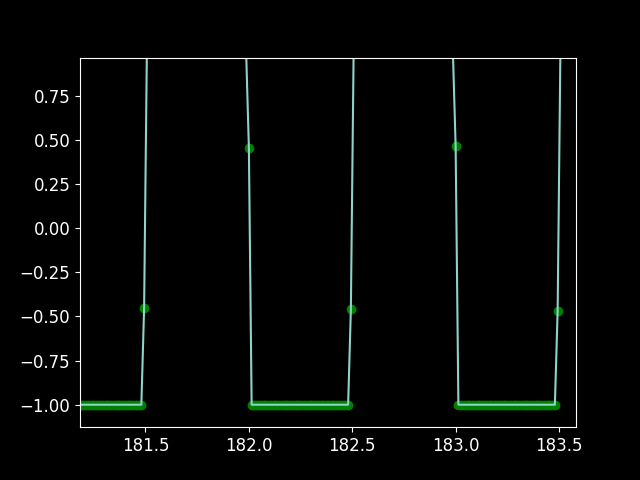

In [41]:
# Plot activity profile vs Time
plt.figure()
plt.scatter(filament.Time/filament.activity_timescale, filament.activity_profile, color ='g')
plt.plot(filament.Time/filament.activity_timescale, filament.activity_profile)

plt.show()

<IPython.core.display.Javascript object>


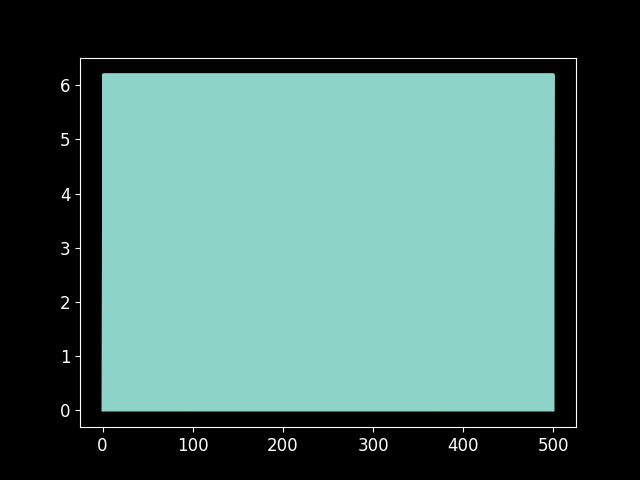

In [19]:
# Plot the phase vs time

plt.figure()
plt.plot(filament.Time/filament.activity_timescale, filament.derived_data['Phase'])
plt.show()

# Dynamics of filament base-tip and tip angles

In [17]:
# WARNING: Run this block before running further analysis of filament tip and filament base-tip angles

filament.compute_base_tip_angle()
filament.compute_tip_angle()
filament.compute_arc_length()

<IPython.core.display.Javascript object>


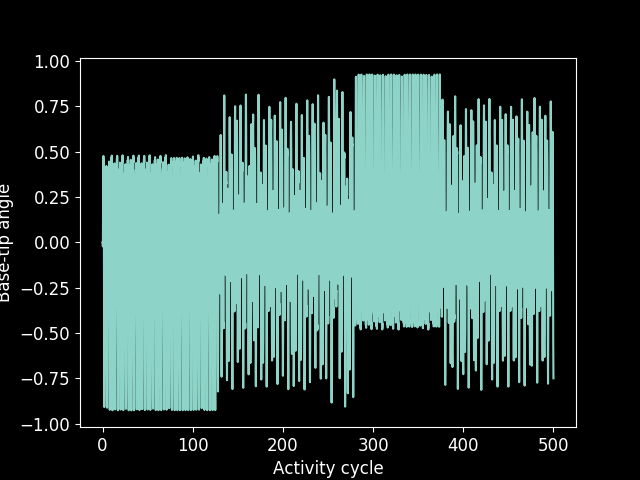

In [43]:
# Time series of filament base tip angle
plt.figure()
plt.plot(filament.Time/filament.activity_timescale, filament.derived_data['base tip angle'])
plt.xlabel('Activity cycle')
plt.ylabel('Base-tip angle')
plt.show()

In [16]:
plt.style.use('dark_background')
# Plot filament length and base-tip angle
filament.plot_phase_portrait('Phase', 'base tip angle', save = True, color_by = 'Phase', start_index = int(filament.Nt/2))

KeyError: 'base tip angle'

<IPython.core.display.Javascript object>


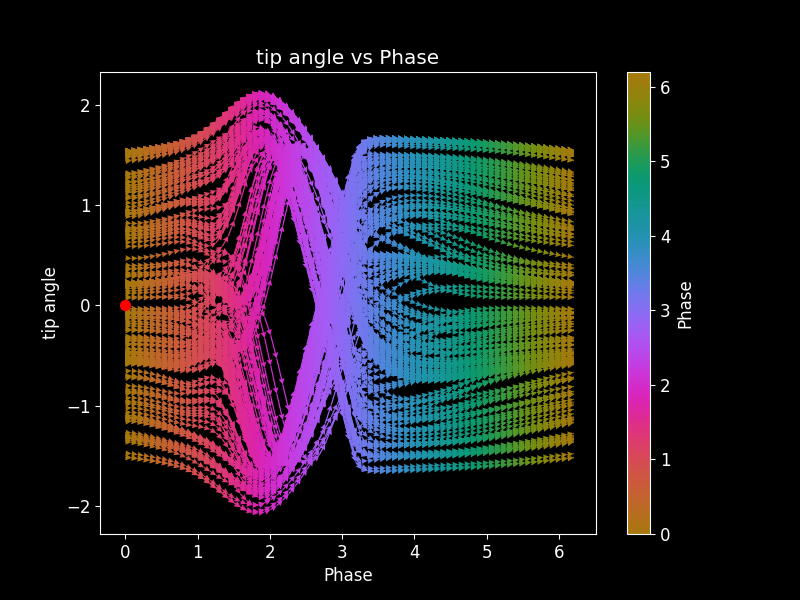

In [46]:
# Plot filament length and filament tip angle

filament.plot_phase_portrait('Phase', 'tip angle', save = True, color_by = 'Phase', start_index = int(filament.Nt/2))

<IPython.core.display.Javascript object>


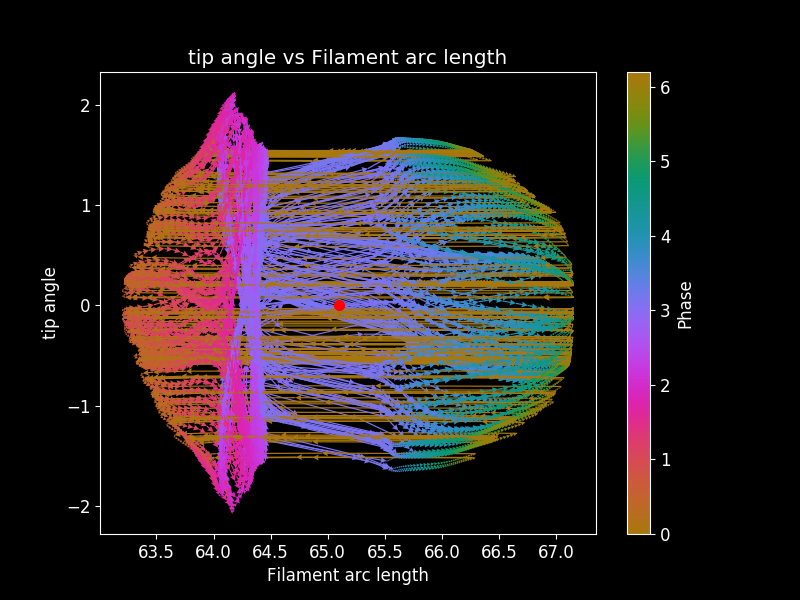

In [47]:
# Plot of tip angle vs Base tip angle
filament.plot_phase_portrait('Filament arc length', 'tip angle', save = False, color_by = 'Phase', start_index = int(filament.Nt/2))

<IPython.core.display.Javascript object>


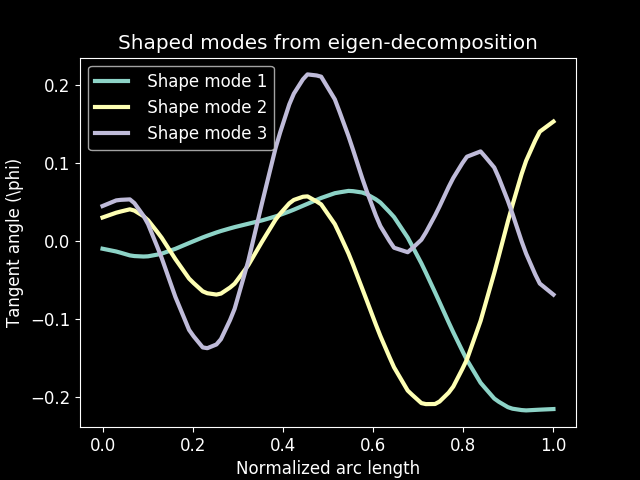

In [53]:
# Mode amplitudes vs Phase
# Shapes corresponding to the eigenvectors
plt.figure()
length_array = np.linspace(0, 1, len(eigenvectors_sig[:,0]))
for ii in range(n_sig_eigenvalues):
    
    plt.plot(length_array, eigenvectors_sorted[:, ii], label =' Shape mode {}'.format(ii+1), linewidth = 3)
    
plt.xlabel('Normalized arc length')
plt.ylabel('Tangent angle (\phi)')
plt.title('Shaped modes from eigen-decomposition')
plt.legend()
plt.show()


## Mode amplitudes vs Phase

<IPython.core.display.Javascript object>


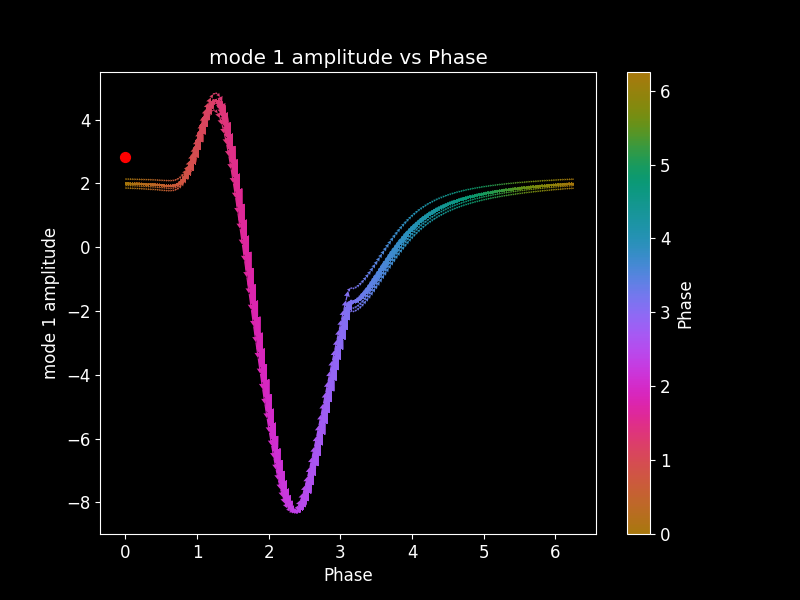

<IPython.core.display.Javascript object>


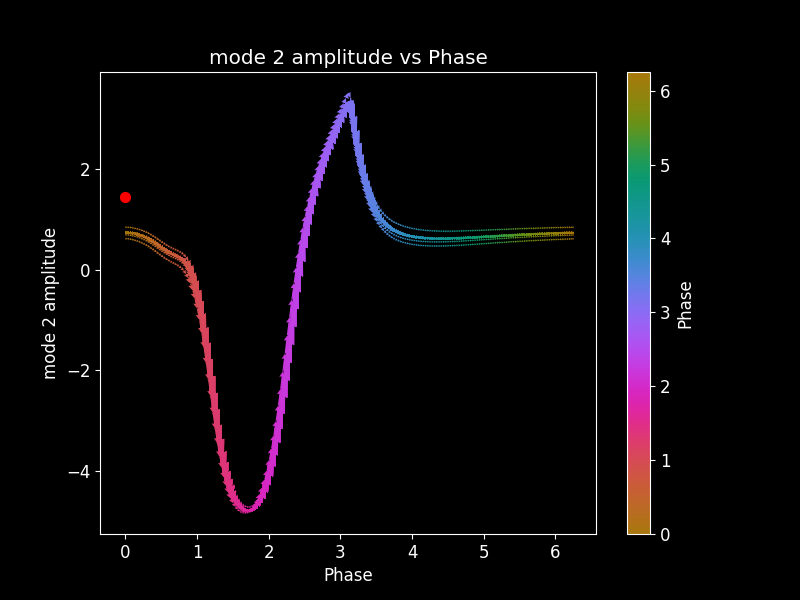

<IPython.core.display.Javascript object>


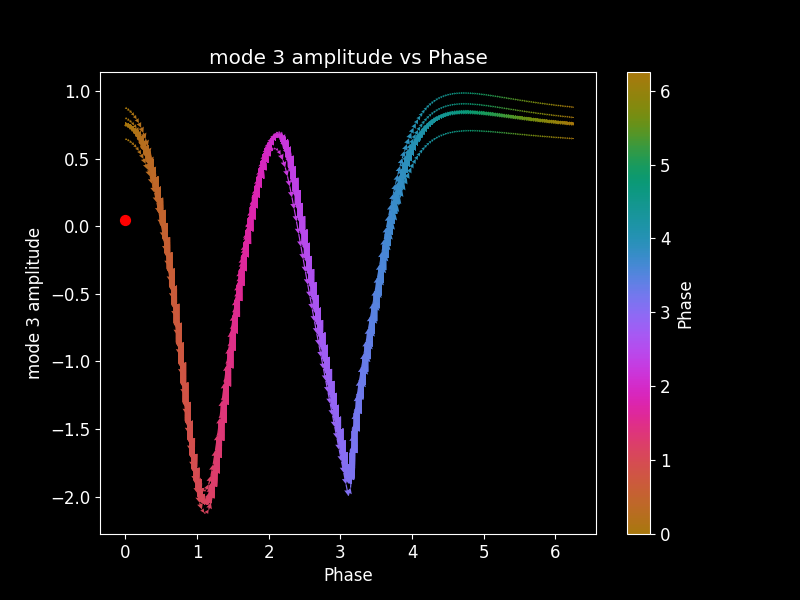

In [54]:
# Plot mode amplitudes vs Phase
for ii in range(n_sig_eigenvalues):
    filament.plot_phase_portrait('Phase', 'mode {} amplitude'.format(ii+1), save = False, color_by = 'Phase', start_index = int(filament.Nt/2))
    

In [ ]:
# Overlay of all mode amplitudes vs Phase



## Find points at constant phase

In [7]:
# Find time points at a constant phase (stroboscopic)
# In the current activity profile, phase = 0 is start of compression, phase = pi is start of extension
phase_value = 0

# Smallest phase difference = 2*pi*delta_T/T
delta_phase = 2*np.pi*np.mean(filament.Time[1:]-filament.Time[:-1])/filament.activity_timescale

print(delta_phase)

abs_val_array = np.abs(filament.derived_data['Phase'] - phase_value)

constant_phase_indices = abs_val_array < 0.5*delta_phase

print(constant_phase_indices)
print(len(constant_phase_indices))
print(len(filament.derived_data['Phase'][constant_phase_indices]))

# Compute the base tip angle
base_tip_angle_constant_phase = filament.derived_data['base tip angle'][constant_phase_indices]
time_array = filament.Time[constant_phase_indices]
n_array = len(base_tip_angle_constant_phase)

# base_tip_angle_constant_phase = base_tip_angle_constant_phase[int(n_array/3):-1]
# time_array = time_array[int(n_array/3):-1]

# Filament orientation velocity vs time
delta_base_tip_angle = (base_tip_angle_constant_phase[1:] - base_tip_angle_constant_phase[:-1])/(time_array[1:] - time_array[:-1])


activity_cycle = time_array/filament.activity_timescale
# assert(len(filament.derived_data['Phase'][constant_phase_indices]) == int(max(filament.Time)/filament.activity_timescale))

# Find filament tip angle at constant phase values
tip_angle_constant_phase = filament.derived_data['tip angle'][constant_phase_indices]
time_array = filament.Time[constant_phase_indices]

delta_tip_angle = (tip_angle_constant_phase[1:] - tip_angle_constant_phase[:-1])/(time_array[1:] - time_array[:-1])

n_array = len(tip_angle_constant_phase)

# tip_angle_constant_phase = tip_angle_constant_phase[int(n_array/1.5):-1]

# time_array = time_array[int(n_array/1.5):-1]
# activity_cycle = time_array/filament.activity_timescale


0.031415926535897934
[ True False False ... False False  True]
100001
501


<IPython.core.display.Javascript object>


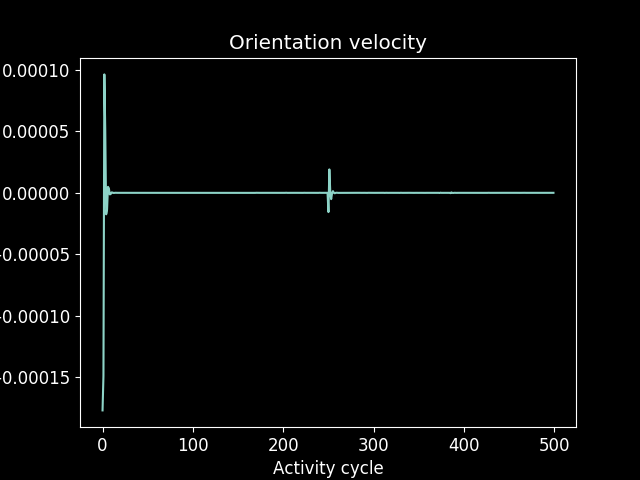

<IPython.core.display.Javascript object>


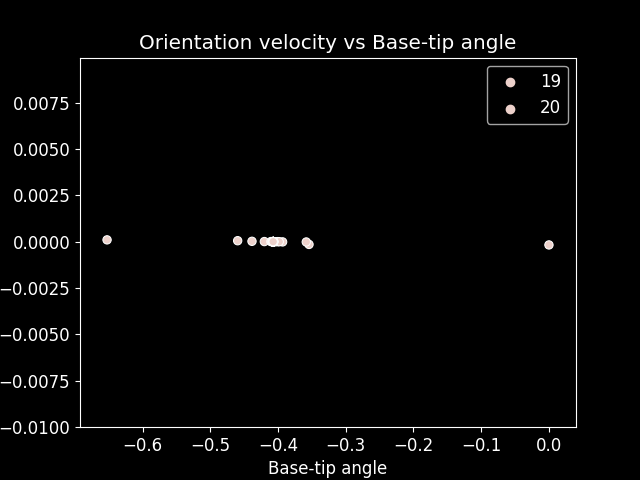

In [8]:
# Plot filament orientation velocity vs Time
file_path = filament.analysis_folder
if(not os.path.exists(file_path)):
    os.makedirs(file_path)

plt.style.use('dark_background')
title = 'Orientation velocity'

plt.figure()
# sns.scatterplot(activity_cycle[:-1], delta_base_tip_angle)
sns.lineplot(activity_cycle[:-1], delta_base_tip_angle)

plt.xlabel('Activity cycle')
plt.ylabel('Base-tip angle velocity')
plt.title(title)
file_name = filament.dataName[:-5] +'_'+title + str(round(phase_value,1))
plt.savefig(os.path.join(file_path, file_name + '.png'), dpi = 300, bbox_inches = 'tight')
plt.savefig(os.path.join(file_path, file_name + '.svg'), dpi = 300, bbox_inches = 'tight')
plt.show()

# Plot angular velocity vs base tip angle
title = 'Orientation velocity vs Base-tip angle'
plt.figure()
sns.scatterplot(base_tip_angle_constant_phase[:-1], delta_base_tip_angle, 20, marker = 'o')
plt.xlabel('Base-tip angle')
plt.ylabel('Base-tip angle velocity')
plt.title(title)
file_name = filament.dataName[:-5] +'_'+title + str(round(phase_value,1))
plt.savefig(os.path.join(file_path, file_name + '.png'), dpi = 300, bbox_inches = 'tight')
plt.savefig(os.path.join(file_path, file_name + '.svg'), dpi = 300, bbox_inches = 'tight')
plt.show()


<IPython.core.display.Javascript object>


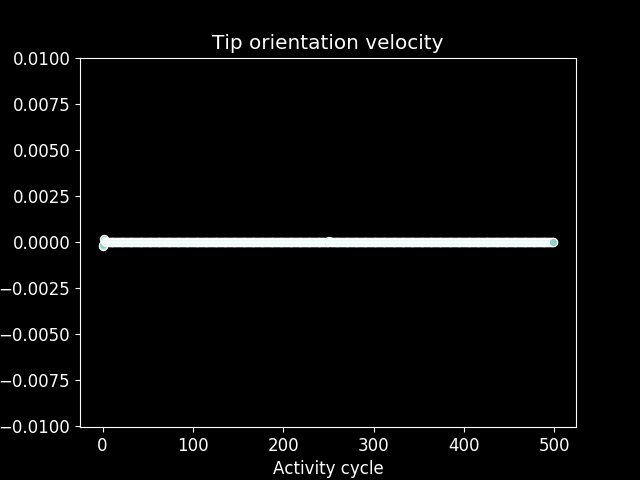

<IPython.core.display.Javascript object>


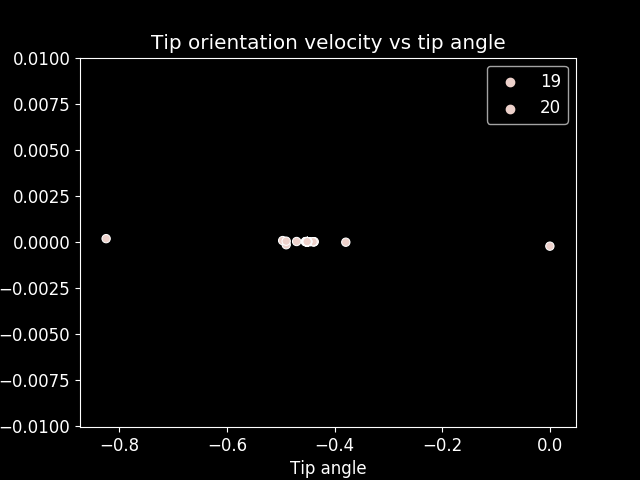

In [9]:
# Plot filament tip orientation velocity vs Time
title = 'Tip orientation velocity'

plt.figure()
sns.scatterplot(activity_cycle[:-1], delta_tip_angle)
plt.xlabel('Activity cycle')
plt.ylabel('Filament tip angle velocity')
plt.title(title)
file_name = filament.dataName[:-5] +'_'+title + str(round(phase_value,1))
plt.savefig(os.path.join(file_path, file_name + '.png'), dpi = 300, bbox_inches = 'tight')
plt.savefig(os.path.join(file_path, file_name + '.svg'), dpi = 300, bbox_inches = 'tight')
plt.show()

# Plot angular velocity vs base tip angle
title = 'Tip orientation velocity vs tip angle'
plt.figure()
sns.scatterplot(tip_angle_constant_phase[:-1], delta_tip_angle, 20, marker = 'o')
plt.xlabel('Tip angle')
plt.ylabel('Tip angle velocity')
plt.title(title)
file_name = filament.dataName[:-5] +'_'+title + str(round(phase_value,1))
plt.savefig(os.path.join(file_path, file_name + '.png'), dpi = 300, bbox_inches = 'tight')
plt.savefig(os.path.join(file_path, file_name + '.svg'), dpi = 300, bbox_inches = 'tight')
plt.show()

# Return maps
Plot X_n+1 vs X_n for various quantities to assess the structure of the underlying aperiodic behavior.

<IPython.core.display.Javascript object>


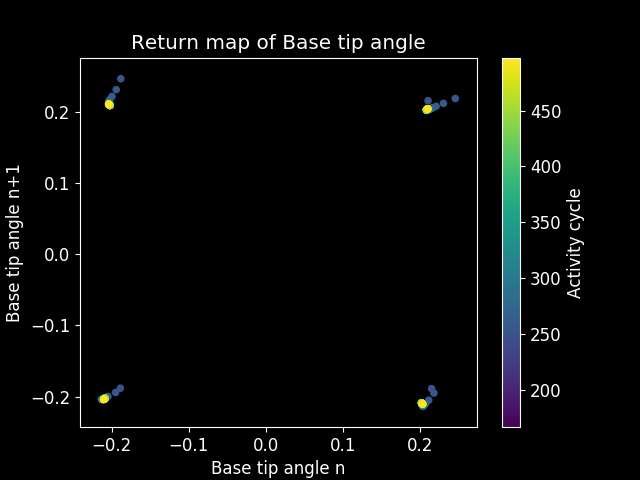

In [382]:
# Plot Return map of filament base-tip orientation
title = 'Base tip angle'
plt.figure()

ax1 = plt.scatter(base_tip_angle_constant_phase[:-1], base_tip_angle_constant_phase[1:], 20, c = activity_cycle[:-1])
plt.xlabel('Base tip angle '+'n')
plt.ylabel('Base tip angle '+'n+1')
plt.title('Return map of '+ title)
cbar = plt.colorbar(ax1)
cbar.ax.set_ylabel('Activity cycle')
file_path = filament.analysis_folder
if(not os.path.exists(file_path)):
    os.makedirs(file_path)

file_name = filament.dataName[:-5] +'_'+title + str(round(phase_value,1))
plt.savefig(os.path.join(file_path, file_name + '.png'), dpi = 300, bbox_inches = 'tight')
plt.savefig(os.path.join(file_path, file_name + '.svg'), dpi = 300, bbox_inches = 'tight')

plt.show()

In [ ]:
# Return map of filament tip angle
title = 'Tip angle'
plt.figure()

ax1 = plt.scatter(tip_angle_constant_phase[:-1], tip_angle_constant_phase[1:], 20, c = activity_cycle[:-1])
plt.xlabel('tip angle '+'n')
plt.ylabel('tip angle '+'n+1')
plt.title('Return map of '+ title)

cbar = plt.colorbar(ax1)
cbar.ax.set_ylabel('Activity cycle')
file_path = filament.analysis_folder
if(not os.path.exists(file_path)):
    os.makedirs(file_path)

file_name = filament.dataName[:-5] +'_'+title + str(round(phase_value,1))
plt.savefig(os.path.join(file_path, file_name + '.png'), dpi = 300, bbox_inches = 'tight')
plt.savefig(os.path.join(file_path, file_name + '.svg'), dpi = 300, bbox_inches = 'tight')

plt.show()

In [355]:
# Return maps of filament shapes before and after the compression
phase_value = 0
abs_val_array = np.abs(filament.derived_data['Phase'] - phase_value)
constant_phase_indices_0 = abs_val_array < 0.5*delta_phase
print(len(filament.derived_data['Phase'][constant_phase_indices_0]))

phase_value = np.pi
abs_val_array = np.abs(filament.derived_data['Phase'] - phase_value)
constant_phase_indices_pi = abs_val_array < 0.5*delta_phase
print(len(filament.derived_data['Phase'][constant_phase_indices_pi]))

phase_value = np.pi/2
abs_val_array = np.abs(filament.derived_data['Phase'] - phase_value)
constant_phase_indices_piby2 = abs_val_array < 0.5*delta_phase
print(len(filament.derived_data['Phase'][constant_phase_indices_piby2]))

phase_value = 3*np.pi/2
abs_val_array = np.abs(filament.derived_data['Phase'] - phase_value)
constant_phase_indices_3piby2 = abs_val_array < 0.5*delta_phase
print(len(filament.derived_data['Phase'][constant_phase_indices_3piby2]))

# Find the tip angles at the two constant phase values
tip_angle_0 = filament.derived_data['tip angle'][constant_phase_indices_0]
tip_angle_0 = tip_angle_0[:-1]
tip_angle_pi = filament.derived_data['tip angle'][constant_phase_indices_pi]
tip_angle_piby2 = filament.derived_data['tip angle'][constant_phase_indices_piby2]
tip_angle_3piby2 = filament.derived_data['tip angle'][constant_phase_indices_3piby2]


time_array = filament.Time[constant_phase_indices_0]
activity_cycle = time_array/filament.activity_timescale



501
500
500
500



## Plot of tip angle after compression vs angle before compression


<IPython.core.display.Javascript object>


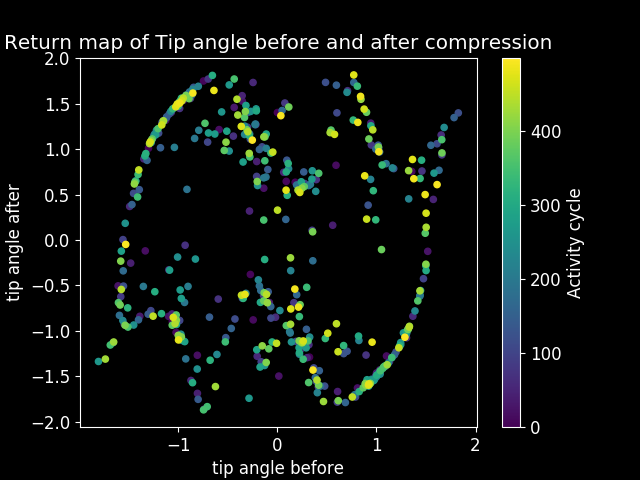

In [349]:
title = 'Tip angle before and after compression'
plt.figure()

ax1 = plt.scatter(tip_angle_0, tip_angle_pi, 20, c = activity_cycle[:-1])
plt.xlabel('tip angle '+'before')
plt.ylabel('tip angle '+'after')
plt.title('Return map of '+ title)

cbar = plt.colorbar(ax1)
cbar.ax.set_ylabel('Activity cycle')
file_path = filament.analysis_folder
if(not os.path.exists(file_path)):
    os.makedirs(file_path)

# file_name = filament.dataName[:-5] +'_'+title + str(round(phase_value,1))
# plt.savefig(os.path.join(file_path, file_name + '.png'), dpi = 300, bbox_inches = 'tight')
# plt.savefig(os.path.join(file_path, file_name + '.svg'), dpi = 300, bbox_inches = 'tight')

plt.show()

## Plot of tip angle during compression and before compression

<IPython.core.display.Javascript object>


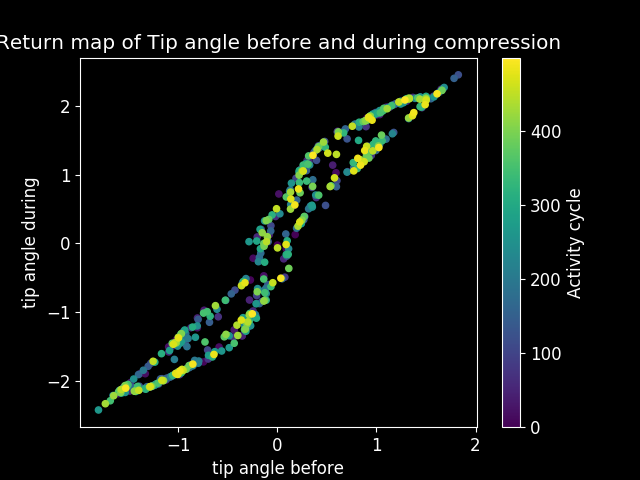

In [351]:
title = 'Tip angle before and during compression'
plt.figure()

ax1 = plt.scatter(tip_angle_0, tip_angle_piby2, 20, c = activity_cycle[:-1])
plt.xlabel('tip angle '+'before')
plt.ylabel('tip angle '+'during')
plt.title('Return map of '+ title)

cbar = plt.colorbar(ax1)
cbar.ax.set_ylabel('Activity cycle')
file_path = filament.analysis_folder
if(not os.path.exists(file_path)):
    os.makedirs(file_path)

# file_name = filament.dataName[:-5] +'_'+title + str(round(phase_value,1))
# plt.savefig(os.path.join(file_path, file_name + '.png'), dpi = 300, bbox_inches = 'tight')
# plt.savefig(os.path.join(file_path, file_name + '.svg'), dpi = 300, bbox_inches = 'tight')

plt.show()

## Plot of tip angle during extension and before extension

<IPython.core.display.Javascript object>


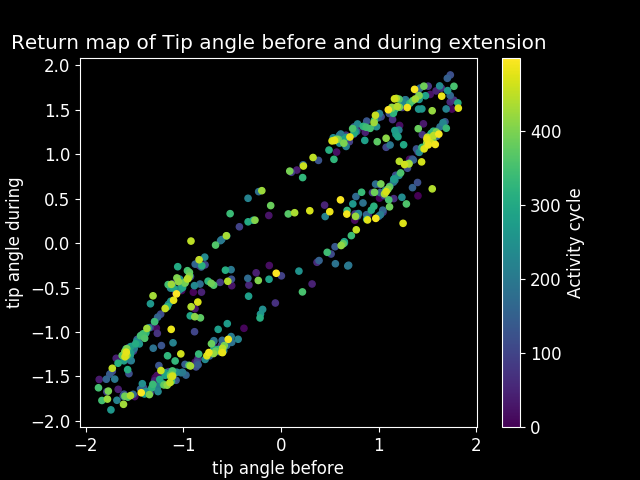

In [352]:
title = 'Tip angle before and during extension'
plt.figure()

ax1 = plt.scatter(tip_angle_pi, tip_angle_3piby2, 20, c = activity_cycle[:-1])
plt.xlabel('tip angle '+'before')
plt.ylabel('tip angle '+'during')
plt.title('Return map of '+ title)

cbar = plt.colorbar(ax1)
cbar.ax.set_ylabel('Activity cycle')
file_path = filament.analysis_folder
if(not os.path.exists(file_path)):
    os.makedirs(file_path)

# file_name = filament.dataName[:-5] +'_'+title + str(round(phase_value,1))
# plt.savefig(os.path.join(file_path, file_name + '.png'), dpi = 300, bbox_inches = 'tight')
# plt.savefig(os.path.join(file_path, file_name + '.svg'), dpi = 300, bbox_inches = 'tight')

plt.show()

ValueError: operands could not be broadcast together with shapes (332,) (165,) 

# Axial and bending energy dynamics

In [1]:
{
    "tags": [
        "hide-cell",
    ]
}

filament.compute_axial_bending_energy()

plt.figure()
plt.plot(filament.Time, filament.derived_data['Axial energy'])
# plt.plot(filament.Time, filament.derived_data['Bending energy'])

ymin = min(filament.derived_data['Axial energy'])
ymax = max(filament.derived_data['Axial energy'])
plt.vlines(filament.Time[constant_phase_indices_0],ymin, ymax,  'g', alpha = 0.5)
plt.vlines(filament.Time[constant_phase_indices_pi], ymin, ymax, 'r', alpha = 0.5)
plt.xlabel('Time')
plt.ylabel('Axial energy')
plt.show()

plt.figure()
plt.plot(filament.Time, filament.derived_data['Bending energy'])
# plt.plot(filament.Time, filament.derived_data['Bending energy'])

ymin = min(filament.derived_data['Bending energy'])
ymax = max(filament.derived_data['Bending energy'])
plt.vlines(filament.Time[constant_phase_indices_0],ymin, ymax,  'g', alpha = 0.5)
plt.vlines(filament.Time[constant_phase_indices_pi], ymin, ymax, 'r', alpha = 0.5)
plt.xlabel('Time')
plt.ylabel('Bending energy')
plt.show()

NameError: name 'filament' is not defined

<IPython.core.display.Javascript object>


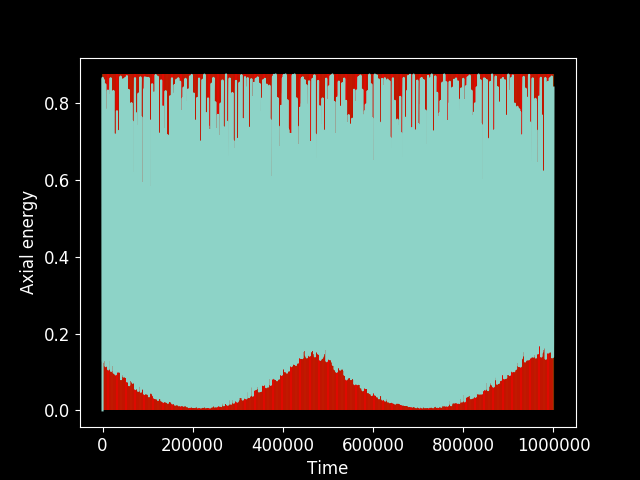

<IPython.core.display.Javascript object>


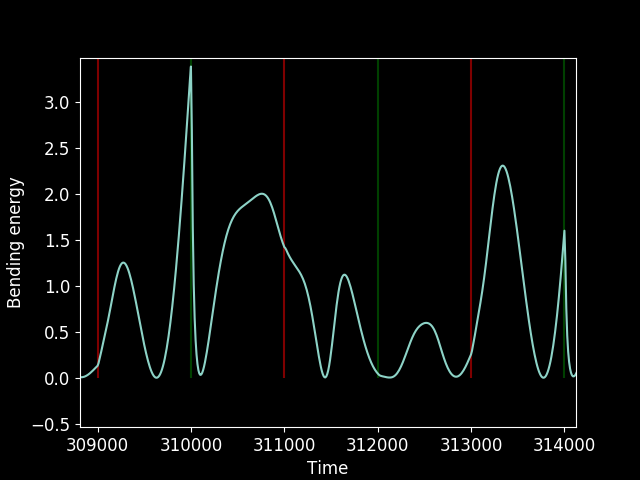

/home/deepak/ActiveFilamentsSearch_backup_3/BendingStiffnessSweeps/b0_2_1_FullSweep_Final/activity_time_750/SimResults_Np_32_Shape_line_kappa_hat_4.0_k_15.0_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 9.999733340444255
No:of particles : 32
No:of time points : 37501
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/BendingStiffnessSweeps/b0_2_1_FullSweep_Final/activity_time_750/SimResults_Np_32_Shape_line_kappa_hat_4.0_k_15.0_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point
Data file SimResults_01.hdf5


# Filament position at constant phase

# Sandbox

<IPython.core.display.Javascript object>


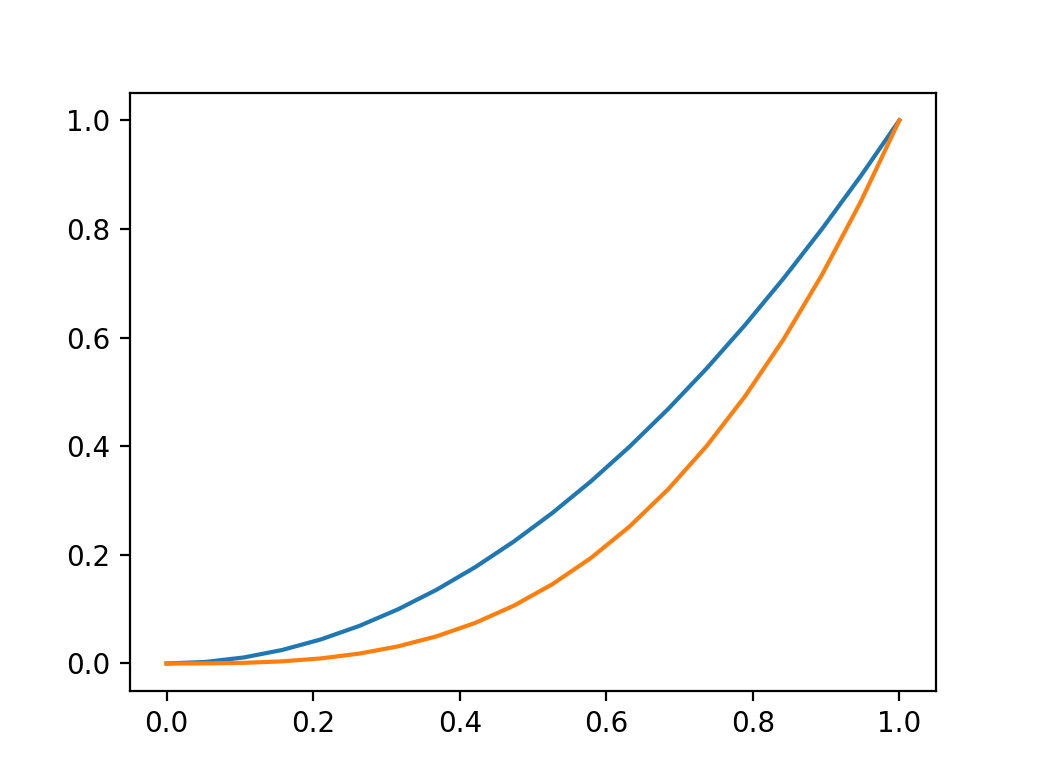

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
x = np.linspace(0,1,20)
y = x**2
z = x**3

plt.figure(num =0)
plt.plot(x, y)
plt.show()

In [8]:
plt.figure(num=0, clear = False)
plt.plot(x, z)
plt.show()

In [102]:
filament.classify_filament_dynamics()

501
**************************************************
Is the dynamics Periodic? :True
**************************************************
The minimum period of the system is 10 times the forcing period
**************************************************


(True, 10)

In [10]:
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2022-03-07/SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.75_activityTime_500_simType_point/sim_data_02_.hdf5'
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2022-03-07/SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/sim_data_00_.hdf5'

file = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2022-03-16/SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/sim_data_01_.hdf5'

filament = analysis.analysisTools(file = file)


<IPython.core.display.Javascript object>


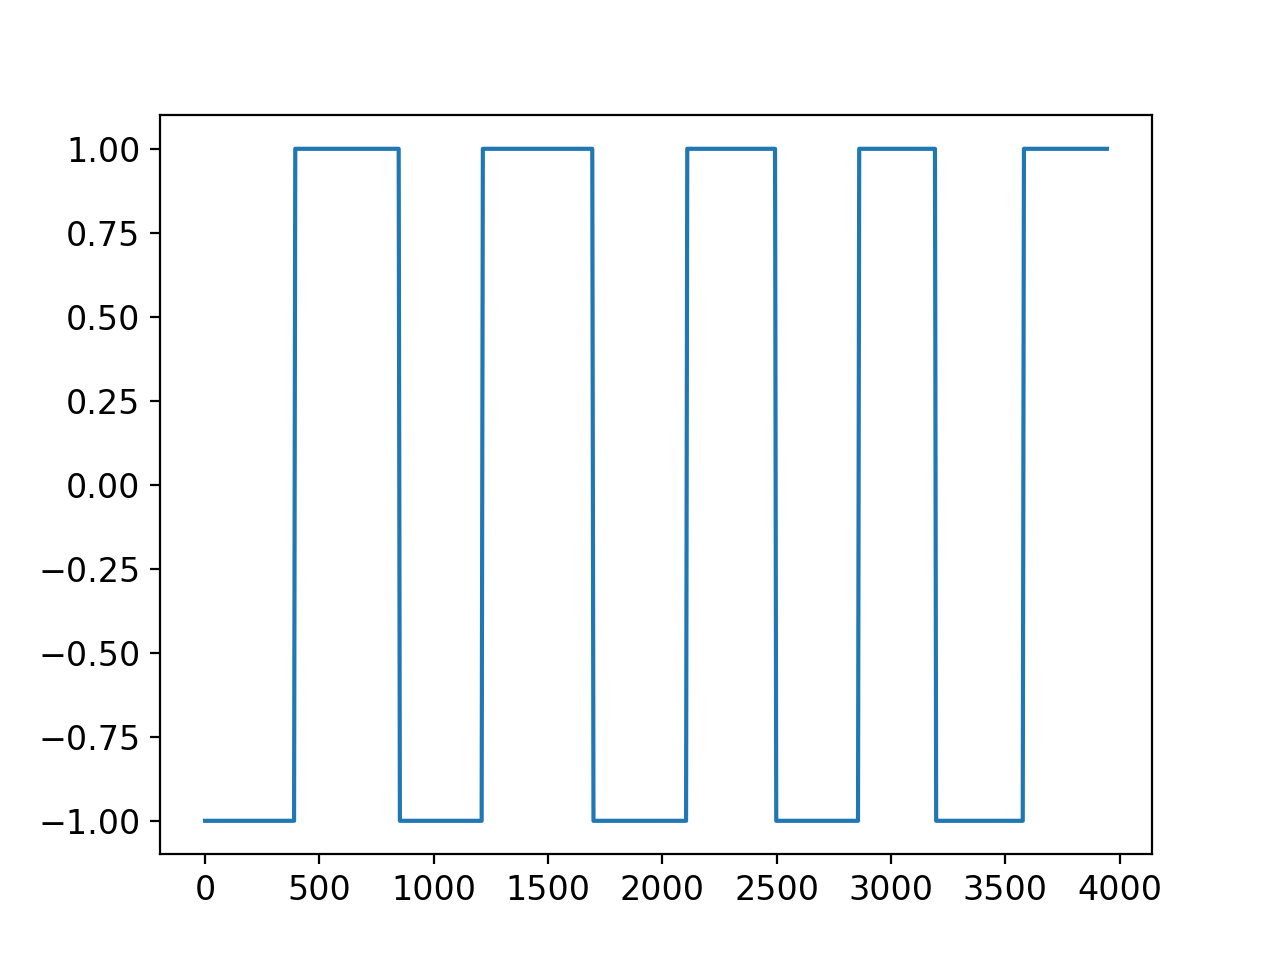

In [11]:
plt.plot(filament.Time, filament.activity_profile)

In [12]:
print(filament.total_tip_distance())

333.70824620623563


In [14]:
filament.filament_tip_coverage()
filament.search_efficiency()

Calculating unique positions and count...
Total unique positions sampled by tip: 109.0


0.3266326236740243